# CAS KAGGLE
## Crims a San Francisco

Marina Palomar González | 1605547

15 de Desembre de 2022

    ###### La última versió del codi està executada ja. Recomano no executar-la de nou perquè per la quantitat de dades que hi ha al conjunt pot arribar a tardar més d'una hora en finalitzar l'execució sencera.

### Inicialitzacions

#### CÀRREGA LLIBRERIES NECESSÀRIES

In [1]:
# Carregant les llibreries necessàries
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from scipy import stats
import holidays # pip install holidays
import matplotlib.gridspec as gridspec
sns.set_style(style='whitegrid')
import time


from sklearn.decomposition import PCA
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
import lightgbm as lgb
from sklearn.impute import SimpleImputer
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier #pip install xgboost
import lightgbm as lgb
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

lon_lat = (-122.5247, -122.3366, 37.699, 37.8299)
mapdata = np.loadtxt("sf_map_copyright_openstreetmap_contributors.txt")

#### FUNCIONS AUXILIARS

In [2]:
def SSNormalitzacio(X):
    scaler = StandardScaler()
    X_scale = pd.DataFrame(scaler.fit_transform(X))
    X_cols = X.columns
    X_scale.columns = X_cols
    return X_scale

In [3]:
def visualize_confusion_matrix(y_pred_train, y_real_train, y_pred_test, y_real_test, annot = True, ret = False):
    #mostra la matriu de confusió i calcula l'accuracy de la matriu
    fig = plt.figure(figsize=(20,6))
    gs = gridspec.GridSpec(1,2)

    ax = fig.add_subplot(gs[0,0])
    cm = confusion_matrix(y_real_train, y_pred_train)
    acc_train = np.sum(cm.diagonal())/np.sum(cm)
    sns.heatmap(cm, annot = annot, cmap = 'GnBu_r')
    ax.set_title("Confusion matrix train")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

    ax = fig.add_subplot(gs[0,1])
    cm = confusion_matrix(y_real_test, y_pred_test)
    acc_test = np.sum(cm.diagonal())/np.sum(cm)
    sns.heatmap(cm, annot = annot, cmap = 'GnBu_r')
    ax.set_title("Confusion matrix test")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

    plt.show()
    print(f"Accuracy train: {acc_train}")
    print(f"Accuracy test: {acc_test}")
    if (ret):
        return acc_test

In [4]:
def mSelection(Xtrain, ytrain, Xtest, ytest, FSelect):
    # Random Forest Classifier
    print("Model Random Forest Classifier")
    t0=time.time()
    modelRF = RandomForestClassifier(max_depth = 4, n_estimators= 400,
                                     random_state =1,n_jobs=-1)
    modelRF.fit(Xtrain[FSelect],ytrain)
    print('Time taken (s):' , time.time()-t0)
    RFacc = visualize_confusion_matrix(modelRF.predict(Xtrain[FSelect]), 
                                       ytrain, modelRF.predict(Xtest[FSelect]), ytest, ret = True)
    
    # Gradient Boosting Classifier
    print("\nModel Gradient Boosting Classifier")
    t0=time.time()
    modelGB = GradientBoostingClassifier(n_estimators=20, learning_rate=0.3, 
                                         criterion = 'friedman_mse', max_depth = 4,
                                         max_features=2, random_state=0)
    modelGB.fit(Xtrain[FSelect], ytrain)
    print('Time taken (s):' , time.time()-t0)
    GBacc = visualize_confusion_matrix(modelGB.predict(Xtrain[FSelect]),
                                       ytrain, modelGB.predict(Xtest[FSelect]), ytest, ret = True)
    
    # Extrem Gradient Boosting Classifier
    print("Model Extrem Gradient Boosting Classifier")
    t0=time.time()
    modelXGB = XGBClassifier().fit(Xtrain[FSelect], ytrain)
    print('Time taken (s):' , time.time()-t0)
    XGBacc = visualize_confusion_matrix(modelXGB.predict(Xtrain[FSelect]),
                                        ytrain, modelXGB.predict(Xtest[FSelect]), ytest, ret = True)

    # Light Gradient Boosting Machine
    print("\nModel Light Gradient Boosting Classifier")
    t0=time.time()
    modelLGB = lgb.LGBMClassifier().fit(Xtrain[FSelect], ytrain)
    print('Time taken (s):' , time.time()-t0)
    LGBacc = visualize_confusion_matrix(modelLGB.predict(Xtrain[FSelect]),
                                        ytrain, modelLGB.predict(Xtest[FSelect]), ytest, ret = True)
    
    # Red Neuronal - MultiLayer Perceptron Classifier
    print("\nModel Multi-Layer Perceptron Classifier")
    t0=time.time()
    modelRN = MLPClassifier(random_state=1, max_iter=300, activation= 'relu').fit(Xtrain[FSelect], ytrain)
    print('Time taken (s):' , time.time()-t0)
    RNacc = visualize_confusion_matrix(modelRN.predict(Xtrain[FSelect]),
                                       ytrain, modelRN.predict(Xtest[FSelect]), ytest, ret = True)

    # One Vs Rest Classifier
    print("\nModel One Vs Rest Classifier")
    t0=time.time()
    modelOvR = OneVsRestClassifier(LogisticRegression()).fit(Xtrain[FSelect], ytrain)
    print('Time taken (s):' , time.time()-t0)
    OvRacc = visualize_confusion_matrix(modelOvR.predict(Xtrain[FSelect]),
                                        ytrain, modelOvR.predict(Xtest[FSelect]), ytest, ret = True)

    # KNN Classifier
    print("\nModel KNN Classifier")
    t0=time.time()
    modelKNN = KNeighborsClassifier(n_neighbors=13).fit(Xtrain[FSelect],ytrain)
    print('Time taken (s):' , time.time()-t0)
    KNNacc = visualize_confusion_matrix(modelKNN.predict(Xtrain[FSelect]),
                                        ytrain, modelKNN.predict(Xtest[FSelect]), ytest, ret = True)
    
    models = np.array([modelRF,modelGB,modelXGB,modelLGB,modelRN,modelOvR,modelKNN])
    acc = np.array([RFacc, GBacc, XGBacc, LGBacc, RNacc, OvRacc, KNNacc])
    print(f"\nEl millor model és {models[np.argmax(acc)]} amb un accuracy de {np.max(acc)}")

In [5]:
def CleanVar(listVar):
    del(listVar)

#### CÀRREGA DATASET

In [6]:
dataset = pd.read_csv('./train.csv')
print(f'Mida de les dades: {dataset.shape}')
ds_copy = dataset.copy()
dataset.head()

Mida de les dades: (878049, 9)


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


### EDA

#### NETEJA DEL CONJUNT DE DADES

In [7]:
# Mirem si hi ha NaNs
print(pd.isnull(ds_copy).values.sum())

0


In [8]:
# Eliminar dades duplicades
ds_copy.drop_duplicates(subset=None,keep="first",inplace=True)
print('Mida original: ',dataset.shape,
     '\nNº de dades repetides: ', dataset.duplicated().sum(),
     '\nMida un cop fet el drop: ',ds_copy.shape)

Mida original:  (878049, 9) 
Nº de dades repetides:  2323 
Mida un cop fet el drop:  (875726, 9)


In [9]:
# Eliminar dades incoherents
ds_copy.describe()

,X,Y
count,875726.000000,875726.000000
mean,-122.422623,37.771032
std,0.030363,0.457497
min,-122.513642,37.707879
25%,-122.432952,37.752427
50%,-122.416446,37.775421
75%,-122.406959,37.784380
max,-120.500000,90.000000


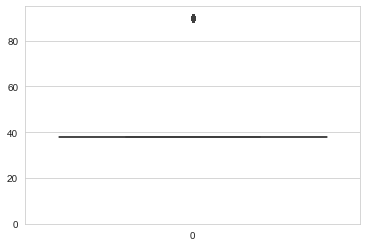

In [10]:
# Eliminar datdes fora de San Francisco
sns.boxplot(ds_copy['Y'])
plt.ylim(0, 95)
ds_copy = ds_copy[ds_copy['Y'] <= 40]

In [11]:
ds_copy.describe()

,X,Y
count,875659.000000,875659.000000
mean,-122.422770,37.767036
std,0.025281,0.024166
min,-122.513642,37.707879
25%,-122.432952,37.752427
50%,-122.416446,37.775421
75%,-122.406959,37.784380
max,-122.364937,37.819975


#### ANÀLISI VARIABLES EXPLICATIVES

In [12]:
ds_copy.describe(include="object")

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address
count,875659,875659,875659,875659,875659,875659,875659
unique,389229,39,879,7,10,17,23191
top,2011-01-01 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Friday,SOUTHERN,NONE,800 Block of BRYANT ST
freq,185,174305,59756,133360,156520,525089,26245


``Dates``

In [13]:
ds_copy['Dates'] = pd.to_datetime(ds_copy['Dates'], format='%Y-%m-%d %H:%M:%S')
ds_copy['Year'] = ds_copy['Dates'].dt.year
ds_copy['Month'] = ds_copy['Dates'].dt.month
ds_copy['Hour'] = ds_copy['Dates'].dt.hour
ds_copy['Day'] = ds_copy['Dates'].dt.day
ds_copy['Date'] = pd.to_datetime(ds_copy[['Year','Month','Day']], format='%Y-%m-%d')
ds_copy['Minute'] = ds_copy['Dates'].dt.minute
DateAnalisi = ds_copy.copy()
DateAnalisi[['Year','Month','Day','Hour','Minute']].describe()

,Year,Month,Day,Hour,Minute
count,875659.000000,875659.000000,875659.000000,875659.000000,875659.000000
mean,2008.712484,6.436043,15.573172,13.413670,20.170046
std,3.631338,3.429085,8.782849,6.549138,18.595969
min,2003.000000,1.000000,1.000000,0.000000,0.000000
25%,2006.000000,3.000000,8.000000,9.000000,0.000000
50%,2009.000000,6.000000,16.000000,14.000000,19.000000
75%,2012.000000,9.000000,23.000000,19.000000,33.000000
max,2015.000000,12.000000,31.000000,23.000000,59.000000


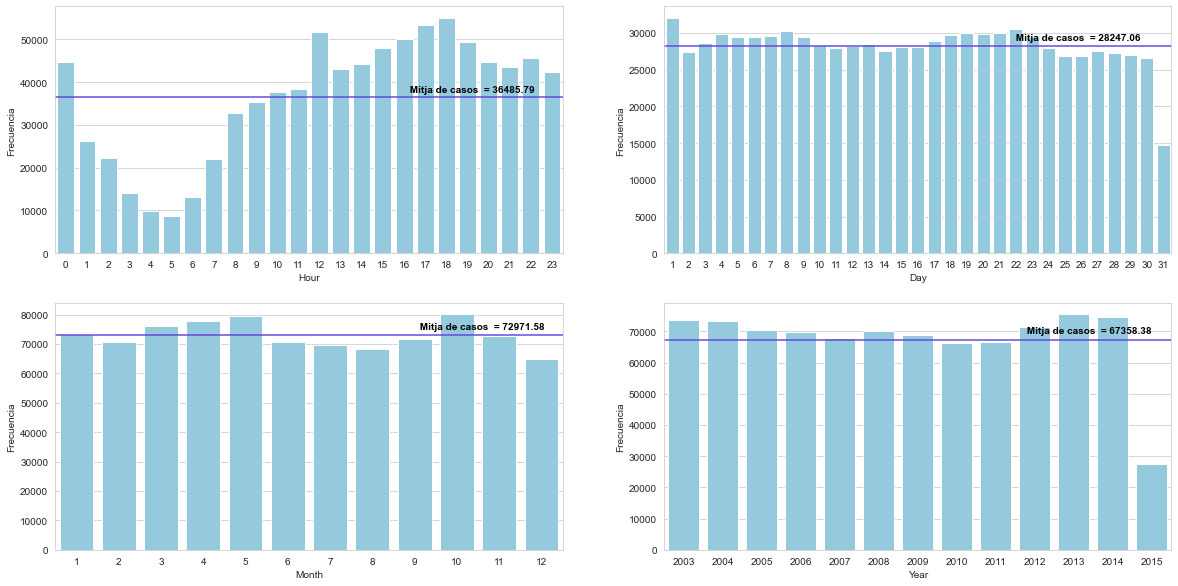

In [14]:
gs = gridspec.GridSpec(2,2)
fig = plt.figure(figsize=(20,10))
times = ['Hour','Day','Month','Year']
for r in range(2):
    for c in range(2):
        ax = fig.add_subplot(gs[r,c])
        ds_aux = ds_copy.groupby([times[2*r+c]])["Dates"].count().reset_index()
        ax = sns.barplot(y="Dates",x=times[2*r+c],data=ds_aux,color="skyblue")
        ax.axhline(ds_aux["Dates"].mean(),color="#6549DA")
        plt.ylabel("Frecuencia")
        ax.text(ds_aux[times[2*r+c]].nunique()-ds_aux[times[2*r+c]].nunique()*0.2,
                ds_aux["Dates"].mean()+ds_aux["Dates"].mean()*0.03, 
                " Mitja de casos  = {:.2f} ".format(ds_aux["Dates"].mean()), 
                horizontalalignment='center', size='medium', color='black', weight='semibold')
plt.show()

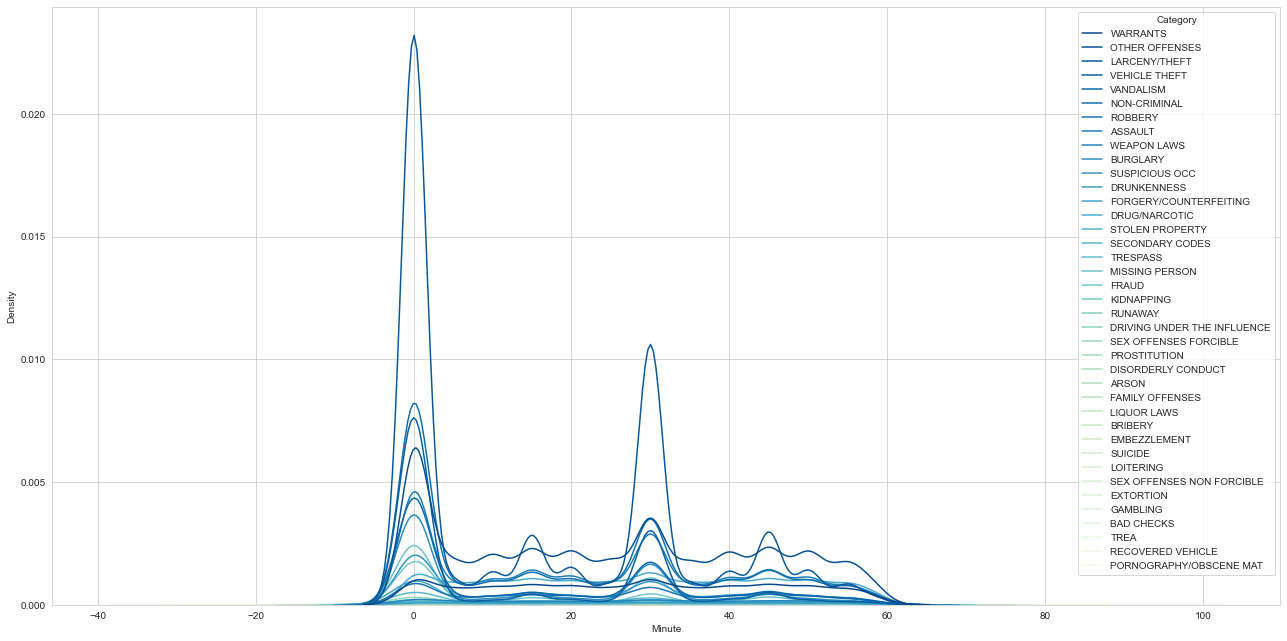

In [15]:
fig, ax = plt.subplots(figsize=(22, 11))
ax = sns.kdeplot(ds_copy, x='Minute', hue = 'Category', palette='GnBu_r')

``Descript``

Valors únics: 879


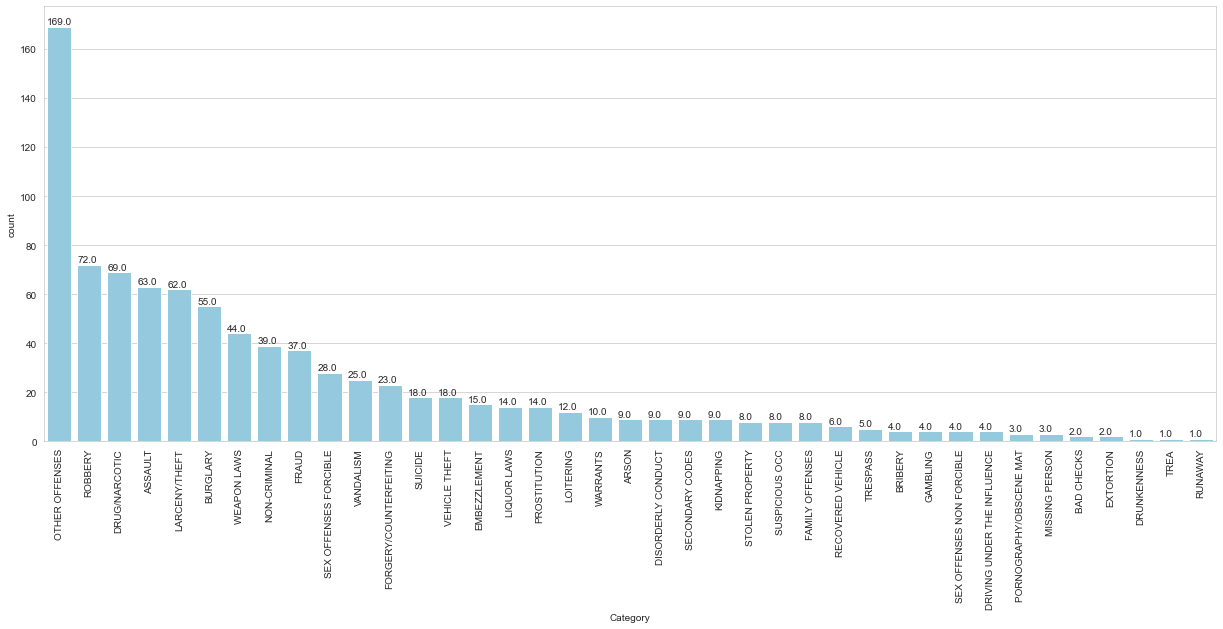

In [16]:
print("Valors únics:", ds_copy['Descript'].nunique())
ct_Desc = pd.crosstab(ds_copy['Descript'], ds_copy['Category']); ct_Desc
stack_Desc = ct_Desc.stack().reset_index().rename(columns = {0:'count'}); stack_Desc
stack_Desc = stack_Desc[stack_Desc['count'] != 0]; stack_Desc
# GB_Desc = pd.DataFrame({'total' : stack_Desc.groupby( [ 'Category'] ).size()}).reset_index()
fig, ax = plt.subplots(1, 1, figsize=(21, 8))
sns.countplot(x=stack_Desc['Category'], order = stack_Desc['Category'].value_counts().index, color='skyblue')
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x(), p.get_height()+1))
ax.tick_params(axis='x', rotation=90)

``DayOfWeek``

Friday       133360
Wednesday    128818
Saturday     126463
Thursday     124746
Tuesday      124592
Monday       121292
Sunday       116388
Name: DayOfWeek, dtype: int64


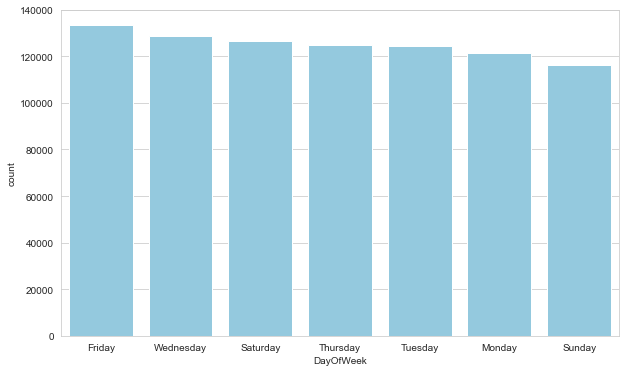

In [17]:
print(ds_copy['DayOfWeek'].value_counts())
fig = plt.figure(figsize=(10,6))
sns.countplot(x=ds_copy['DayOfWeek'], order = ds_copy['DayOfWeek'].value_counts().index, color='skyblue')

``PdDistrict``

SOUTHERN      156520
MISSION       119722
NORTHERN      105093
BAYVIEW        89089
CENTRAL        85262
TENDERLOIN     81627
INGLESIDE      78718
TARAVAL        65396
PARK           49159
RICHMOND       45073
Name: PdDistrict, dtype: int64


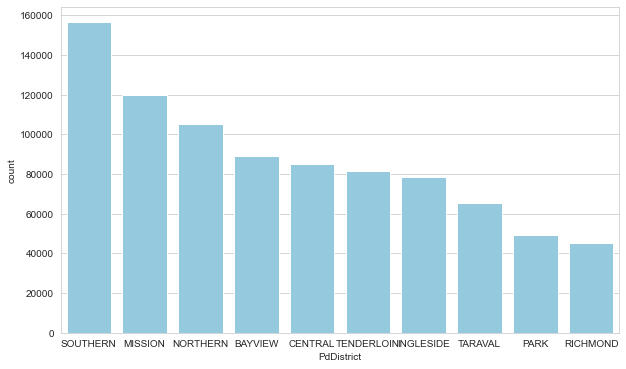

In [18]:
print(ds_copy['PdDistrict'].value_counts())
fig = plt.figure(figsize=(10,6))
sns.countplot(x=ds_copy['PdDistrict'], order = ds_copy['PdDistrict'].value_counts().index, color='skyblue')
ax.tick_params(axis='x', rotation=90)

``Resolution``

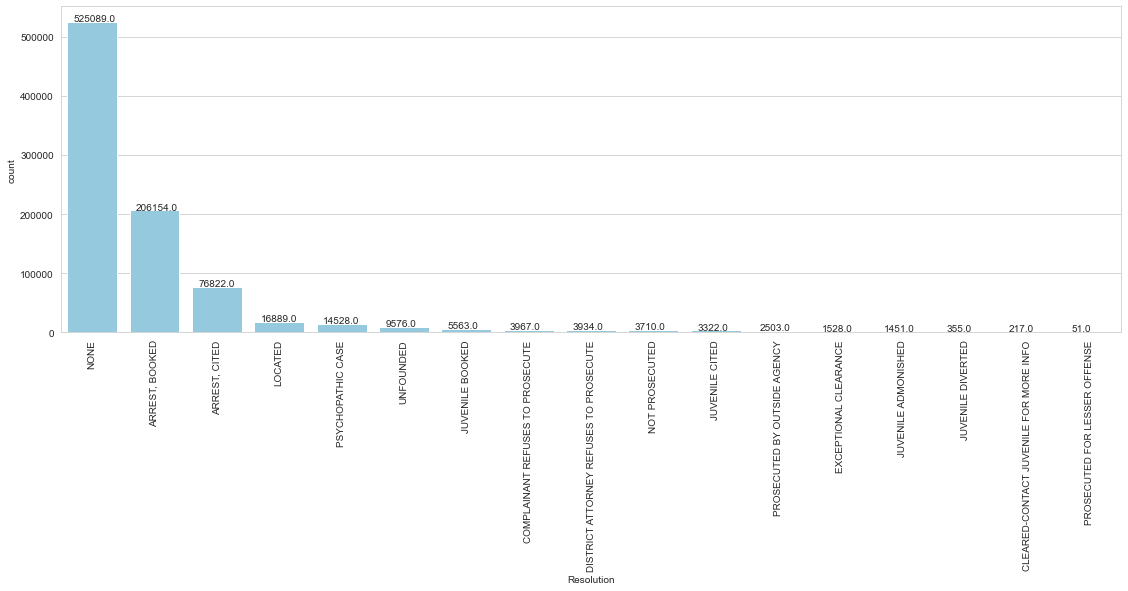

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(19, 6))
sns.countplot(x=ds_copy['Resolution'], order = ds_copy['Resolution'].value_counts().index, color='skyblue')
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+1500))
ax.tick_params(axis='x', rotation=90)

``Address``

In [20]:
print("Valors únics:", ds_copy['Address'].nunique())
AddressAux = ds_copy.copy()
AddressAux['Block'] = AddressAux['Address'].str.contains('block', case=False).astype(int)
AddressAux['ST'] = AddressAux['Address'].str.contains('ST /', case=False).astype(int)
AddressAux['AV'] = AddressAux['Address'].str.contains('AV /', case=False).astype(int)
AddressAux['PL'] = AddressAux['Address'].str.contains('PL /', case=False).astype(int)
AddressAux[['Block','ST','AV','PL']].sum(axis=0)

Valors únics: 23191


Block    615322
ST       206256
AV        41924
PL          241
dtype: int64

``Category``

Número de categories total:  39


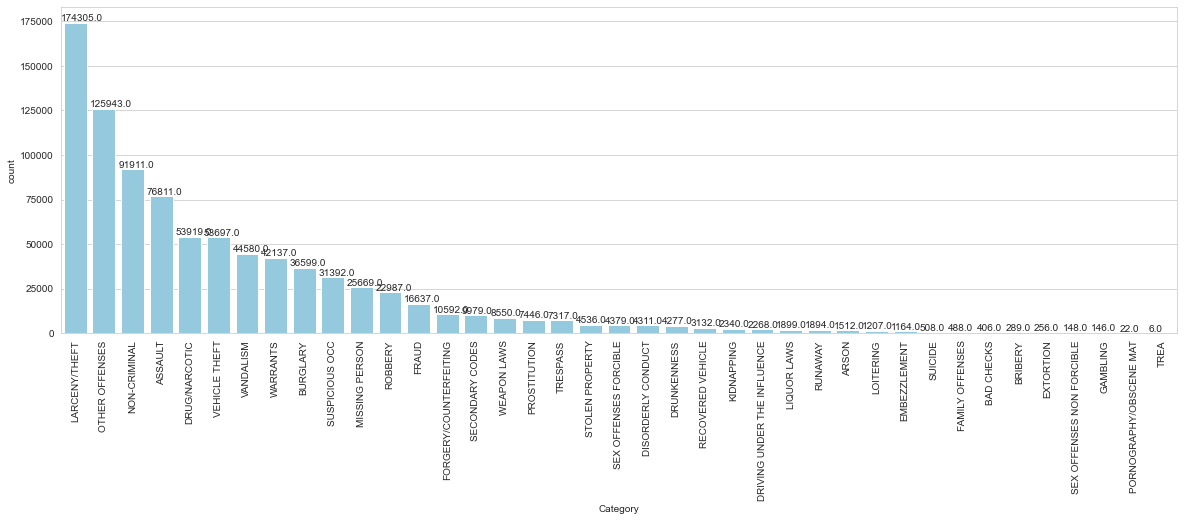

In [21]:
print("Número de categories total: ",ds_copy['Category'].nunique())
fig, ax = plt.subplots(1, 1, figsize=(20, 6))
sns.countplot(x=ds_copy['Category'], order = ds_copy['Category'].value_counts().index, color='skyblue')
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()-0.1, p.get_height()+1000))
ax.tick_params(axis='x', rotation=90)

#### RELACIONS ENTRE VARIABLES

##### Correlació entre ``Descript`` i ``Category``

chi^2:  32811073.41158931
p-value:  0.0
Graus de llibertat:  34281


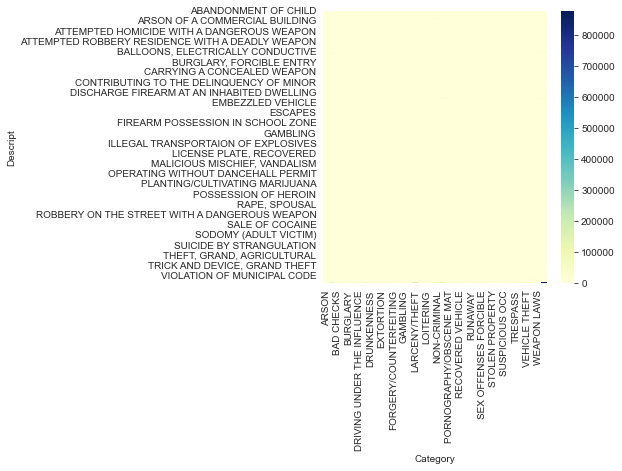

In [22]:
# Correlació entre variables Descript i Category
ct_Desc = pd.crosstab(ds_copy['Descript'], ds_copy['Category'], margins=True)
plt.figure(figsize=(5,5)) 
sns.heatmap(ct_Desc, cmap="YlGnBu")
c, p, gl, _ = stats.chi2_contingency(ct_Desc)
print("chi^2: ",c)
print("p-value: ",p)
print("Graus de llibertat: ",gl)

Com el pvalor és menor a 0.05, la hipotesi nula de que les variables són independents és nul·la, cosa que em quadra amb l'estudi fet. La majoria de valors expectants són menors a 5 cosa que fa dubtar de la fiabilitat de l'estudi però perque la taula de contingencia està plena de zeros, els valors no nuls són majors a 5.

###### ``Descript`` més recurrent per ``Category``

In [23]:
ct_Desc = pd.crosstab(ds_copy['Descript'], ds_copy['Category']); ct_Desc
stack_Desc = ct_Desc.stack().reset_index().rename(columns = {0:'count'}); stack_Desc
sum_Desc = ct_Desc.sum().reset_index().rename(columns = {0:'total'}); sum_Desc
DescrMerge = stack_Desc.merge(sum_Desc); DescrMerge
DescrData = DescrMerge[DescrMerge['count'] != 0].sort_values(by=['count','Category'], ascending=False).reset_index(drop = True)
DescrData['%'] = DescrData['count']/DescrData['total']*100
DescrData = DescrData.drop(columns = ['count','total'])
temp = pd.DataFrame()
for c in (DescrData['Category'].unique()):
    aux = DescrData[DescrData['Category'] == c]
    temp = pd.concat([temp, aux[0:1]])
temp.reset_index(drop=True)

,Descript,Category,%
0,GRAND THEFT FROM LOCKED AUTO,LARCENY/THEFT,34.282436
1,LOST PROPERTY,NON-CRIMINAL,34.270109
2,BATTERY,ASSAULT,35.691503
3,STOLEN AUTOMOBILE,VEHICLE THEFT,50.025141
4,"DRIVERS LICENSE, SUSPENDED OR REVOKED",OTHER OFFENSES,21.292966
5,WARRANT ARREST,WARRANTS,56.242732
6,SUSPICIOUS OCCURRENCE,SUSPICIOUS OCC,69.686544
7,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",VANDALISM,39.739794
8,POSSESSION OF NARCOTICS PARAPHERNALIA,DRUG/NARCOTIC,18.620523
9,FOUND PERSON,MISSING PERSON,35.899334


##### Crims simultànis

In [24]:
ds_MultCrims = ds_copy.groupby(['Dates', 'X', 'Y']).size()
ds_MultCrims = pd.DataFrame(ds_MultCrims)
ds_MultCrims = ds_MultCrims.reset_index()
ds_copy = ds_copy.merge(ds_MultCrims, how='right')
ds_copy.rename(columns={0:'NumMultCrims'}, inplace=True)
ds_copy['NumMultCrims'].value_counts()/sorted(ds_copy['NumMultCrims'].unique())

1     551788.0
2      96925.0
3      33855.0
4       4195.0
5       1355.0
6        434.0
7        159.0
8         69.0
9         38.0
10        13.0
11         9.0
12         4.0
13         1.0
Name: NumMultCrims, dtype: float64

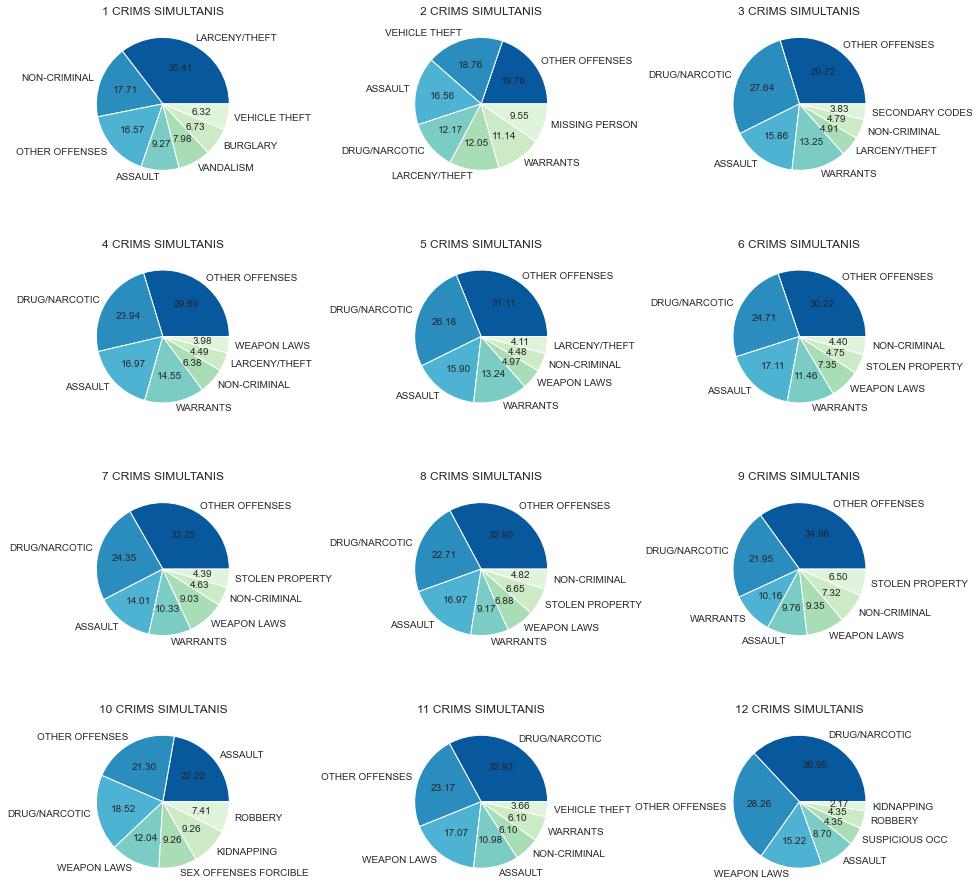

In [25]:
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(15,15))
colors = ['#08589e', '#2b8cbe', '#4eb3d3', '#7bccc4', '#a8ddb5', '#ccebc5', '#e0f3db', '#f7fcf0']
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
i=0
for r in range(4):
    for c in range(3):
        if (i < ds_copy['NumMultCrims'].nunique()):
            aux = ds_copy[ds_copy['NumMultCrims'] == i+1]
            im = ax[r, c].pie(aux['Category'].value_counts()[0:7], labels= aux['Category'].value_counts().keys()[0:7],
            colors=colors, autopct = '%.2f')
            ax[r, c].set_title("{} CRIMS SIMULTANIS".format(i+1))
            i=i+1
plt.show()

##### Crims amb ``Resolution = NONE``

In [26]:
# Crims sense resolució
NoneData = ds_copy[ds_copy['Resolution'] == 'NONE']
print("El {:.2f}% de les dades del dataset original són crims no resolts".format(NoneData.size/ds_copy.size*100))

El 59.97% de les dades del dataset original són crims no resolts


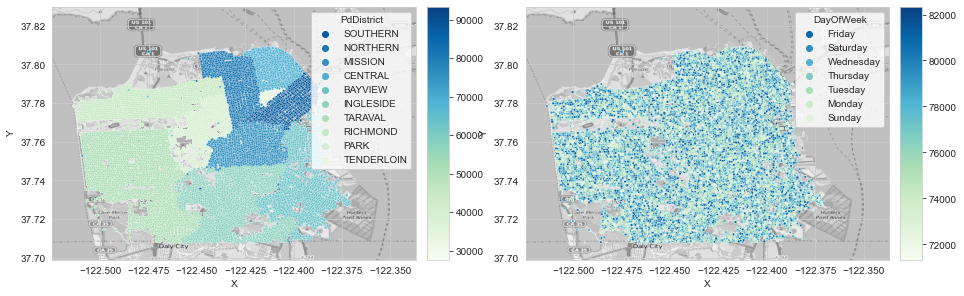

SOUTHERN      93415
NORTHERN      70098
MISSION       62930
CENTRAL       60221
BAYVIEW       51551
INGLESIDE     50954
TARAVAL       44908
RICHMOND      32623
PARK          30795
TENDERLOIN    27594
Name: PdDistrict, dtype: int64
Friday       82347
Saturday     77982
Wednesday    74322
Thursday     73839
Tuesday      72711
Monday       72559
Sunday       71329
Name: DayOfWeek, dtype: int64


In [27]:
gs = gridspec.GridSpec(1,2, wspace=0.3)
fig = plt.figure(figsize=(15,15))

# Gràfic avaluant PdDistrict
ax = fig.add_subplot(gs[0,0])
ax.imshow(mapdata,extent=lon_lat, cmap=plt.get_cmap('gray'))
hue_order = list(NoneData['PdDistrict'].value_counts().keys())
sc = sns.scatterplot(x = NoneData['X'], y = NoneData['Y'], hue = NoneData['PdDistrict'], hue_order = hue_order,
                     palette='GnBu_r', s=5)
norm = plt.Normalize(NoneData['PdDistrict'].value_counts().max(), NoneData['PdDistrict'].value_counts().min())
sm = plt.cm.ScalarMappable(cmap='GnBu', norm=norm)
cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
ax.figure.colorbar(sm, cax = cax)

# Gràfic avaluant DayOfWeek
ax = fig.add_subplot(gs[0,1])
ax.imshow(mapdata,extent=lon_lat, cmap=plt.get_cmap('gray'))
hue_order = list(NoneData['DayOfWeek'].value_counts().keys())
sc = sns.scatterplot(x = NoneData['X'], y = NoneData['Y'], hue = NoneData['DayOfWeek'], hue_order = hue_order,
                     palette='GnBu_r', s=5)
norm = plt.Normalize(NoneData['DayOfWeek'].value_counts().max(), NoneData['DayOfWeek'].value_counts().min())
sm = plt.cm.ScalarMappable(cmap='GnBu', norm=norm)
cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
ax.figure.colorbar(sm, cax = cax)
plt.show()

print(NoneData['PdDistrict'].value_counts())
print(NoneData['DayOfWeek'].value_counts())

D'aquestes dues gràfiques podem veure que tot i ser dades bastant equivalents, el districte amb més casos sense resoldre és el 'SOUTHERN' i el dia de la setmana amb més casos sense resoldre és 'Friday'

LARCENY/THEFT     156047
NON-CRIMINAL       68162
VEHICLE THEFT      49162
ASSAULT            44687
VANDALISM          39089
OTHER OFFENSES     33125
BURGLARY           30706
OTHER CRIMES       30380
SUSPICIOUS OCC     27522
ROBBERY            17616
FRAUD              12538
MISSING PERSON      9231
DRUG/NARCOTIC       4632
WARRANTS            2192
Name: Category, dtype: int64


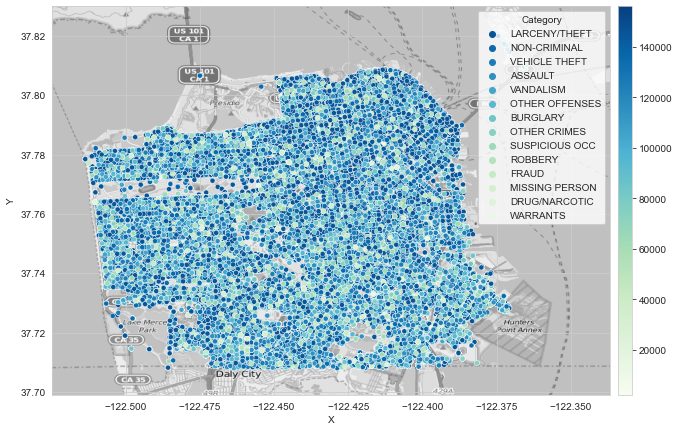

In [28]:
# Agrupem categories tal que les que formen menys d'un 10% dels crims registrats siguin només una dada
NoneDataCat = NoneData.copy()
ds_CatVal = pd.DataFrame(ds_copy['Category'].value_counts()).reset_index().rename(columns={'Category':'value', 'index':'Category'})
ds_CatVal['Cat2'] = ds_CatVal.loc[:, 'Category']
ds_CatVal.loc[ds_CatVal['value'] < 15000, 'Cat2'] = 'OTHER CRIMES'
dic_CatVal = ds_CatVal.drop(columns = ['value']).set_index('Category').to_dict()['Cat2']
NoneDataCat['Category'] = NoneDataCat['Category'].map(dic_CatVal)

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(1,1,1)
ax1.imshow(mapdata,extent=lon_lat, cmap=plt.get_cmap('gray'))
print(NoneDataCat['Category'].value_counts())

hue_order = list(NoneDataCat['Category'].value_counts().keys())
sc = sns.scatterplot(x = NoneDataCat['X'], y = NoneDataCat['Y'], hue = NoneDataCat['Category'], hue_order = hue_order,
                     palette='GnBu_r', s = 25)
norm = plt.Normalize(NoneDataCat['Category'].value_counts().max(), NoneDataCat['Category'].value_counts().min())
sm = plt.cm.ScalarMappable(cmap='GnBu', norm=norm)
cax = fig.add_axes([ax1.get_position().x1+0.01,ax1.get_position().y0,0.02,ax1.get_position().height])
ax1.figure.colorbar(sm, cax = cax)
plt.show()

Tenint en compte que la categoria *'Larceny/Theft'* correspon a un 20% del total dels crims classificats i aproximadament a un 30% dels crims amb resolució nul·la, no es pot arribar a la conclusió que els crims d'aquesta categoria són directament classificables en saber que no estàn resolts. 

##### ``Category`` majoritària per ``PdDistrict``

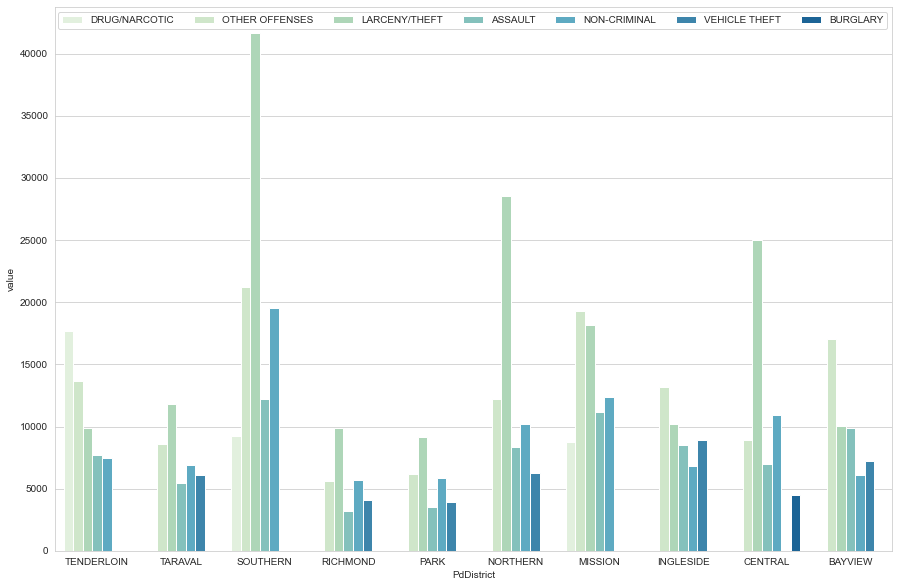

In [29]:
ctDist_Cat = pd.crosstab(ds_copy['PdDistrict'], ds_copy['Category'])
Dist_Cat= ctDist_Cat.stack().reset_index().rename(columns= {0:'value'})
Dist_Cat2 = Dist_Cat.sort_values(by=['PdDistrict','value'], ascending=False).reset_index()
temp = pd.DataFrame()
for d in (Dist_Cat2['PdDistrict'].unique()):
    aux = Dist_Cat2[Dist_Cat2['PdDistrict'] == d]
    temp = pd.concat([temp, aux[0:5]])
fig, bar= plt.subplots(figsize= (15,10))
bar= sns.barplot(x= temp['PdDistrict'], y= temp['value'], hue= temp['Category'], palette='GnBu')
plt.legend(ncol=7)

##### ``Category`` majoritària per ``Year``

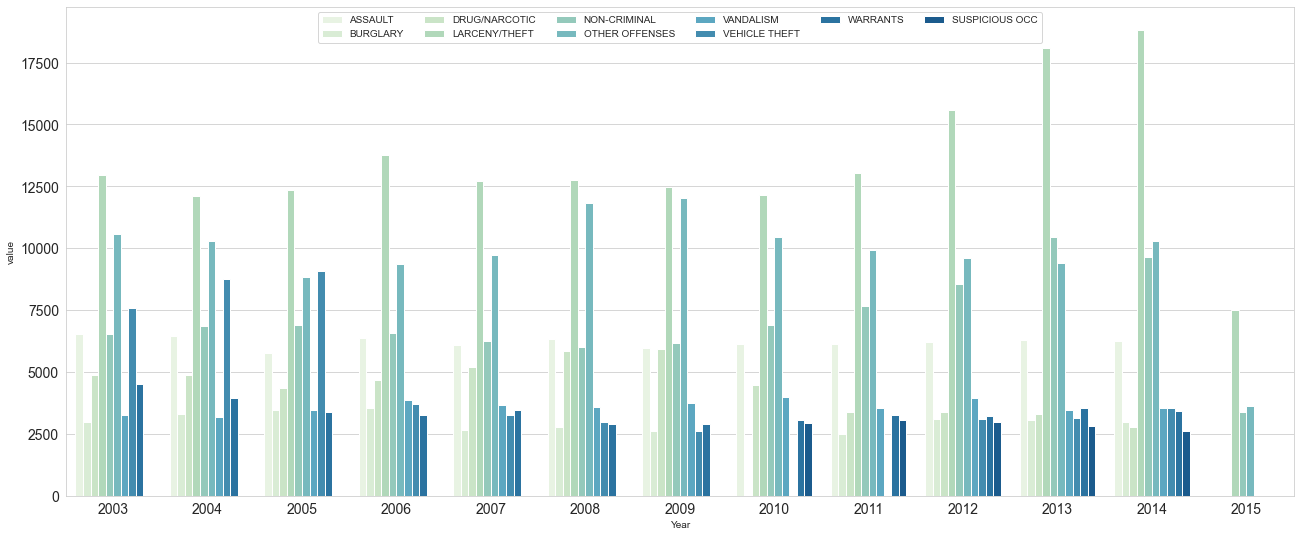

In [30]:
ct_year = pd.crosstab(ds_copy['Year'], ds_copy['Category'])
StackYear= ct_year.stack().reset_index().rename(columns= {0:'value'})
StackYear = StackYear[StackYear['value'] > 2500]
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(22, 9))
ax = sns.barplot(x=StackYear['Year'], y=StackYear['value'],  hue=StackYear['Category'],palette='GnBu')
ax.legend(loc='best',ncol=6)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

##### Creixement anual per ``Category``

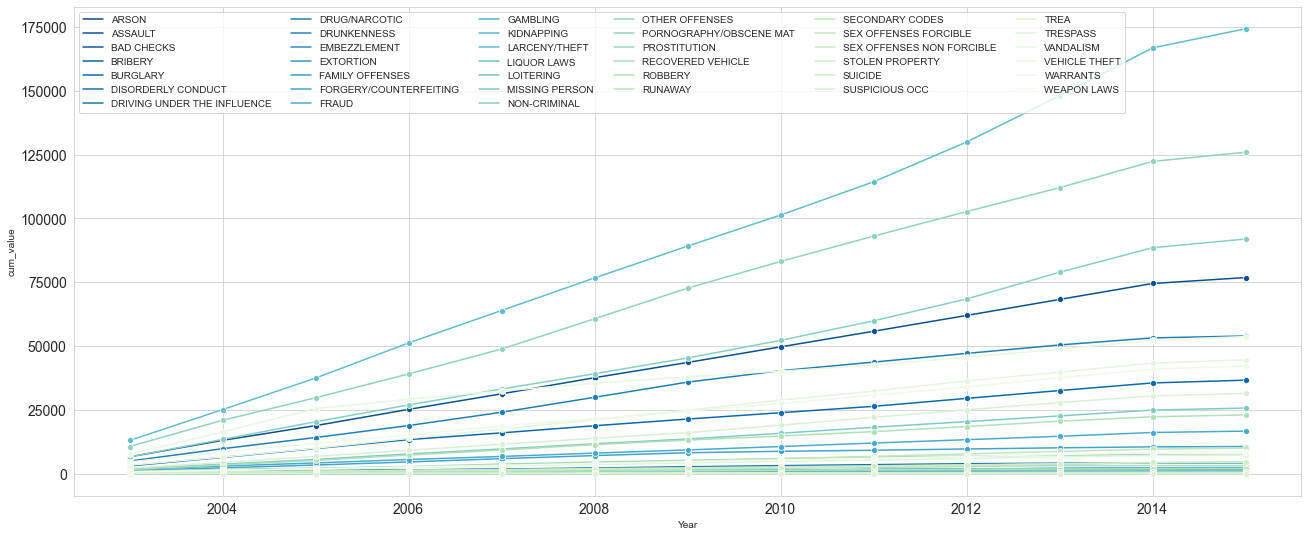

In [31]:
ct_year = pd.crosstab(ds_copy['Year'], ds_copy['Category'])
cm_year = ct_year.cumsum()
StackYear= cm_year.stack().reset_index().rename(columns = {0:'cum_value'})
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(22, 9))
ax = sns.lineplot(x=StackYear['Year'], y=StackYear['cum_value'],  hue=StackYear['Category'], marker="o",palette='GnBu_r')
ax.legend(loc='best',ncol=6)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

### Preprocessing

L'objectiu principal de la practica serà classificar a quina categoria pertany un crim segons el context en que aquest s'ha donat a terme.

(Si hi ha temps es podria predir si un cas segons les caracteristiques que comporta tidrà resolució no)

Per tal de classificar a quina categoria pertany el crim es modificarà el dataset per tal de tenir els atributs que inicialment es creu que serviràn a l'hora de predir (no categòrics) i per simplificar una mica el problema, es classificaràn les 10 classes més recurrents + una categoria d'altres tipus.

#### PRIMER MODEL

En aquest apartat és generarà un model amb les variables d'entrada  s'avaluarà l'accuracy obtingut al entrenar amb aquest. Si s'obté un baix accuracy, s'intentarà generar noves variables al model que funcionin com a context d'un crim per tal d'afegir informació i així intentar augmentar l'accuracy del model final.

In [32]:
ds_model1 = ds_copy.copy()

# Eliminar columnes innecesaries al context
ds_model1 = ds_model1.drop(columns=['Date','Dates','Resolution','Descript'])

# Prenent el nom de les columnes categoriques i numèriques
cols = ds_model1.columns
num_cols = ds_model1._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_cols))

# LabelEncoder sobre les columnes categòriques
le = LabelEncoder()
for c in cat_cols:
    ds_model1[c] = le.fit_transform(ds_model1[c])
    
# Separació del conjunt en X i Y
y_model1 = ds_model1['Category']
X_model1 = ds_model1.drop(columns=['Category'])

# Visualització del nou dataset
print(ds_model1.shape)
ds_model1.head()

(875659, 12)


,Category,DayOfWeek,PdDistrict,Address,X,Y,Year,Month,Hour,Day,Minute,NumMultCrims
0,37,6,4,19762,-122.425892,37.774599,2015,5,23,13,53,2
1,21,6,4,19762,-122.425892,37.774599,2015,5,23,13,53,2
2,21,6,4,22661,-122.424363,37.800414,2015,5,23,13,33,1
3,16,6,4,4266,-122.426995,37.800873,2015,5,23,13,30,1
4,16,6,5,1843,-122.438738,37.771541,2015,5,23,13,30,1


##### PCA

Tot i saber que el model està exclòs d'outliers, s'ha realitzat un PCA per veure si es podria disminuir d'entrada la dimensionalitat del conjunt de dades amb la variança explicada per aquestes.

Text(0, 0.5, '% variança explicat')

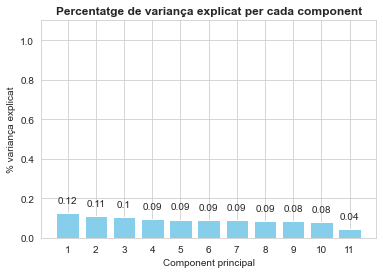

In [33]:
#Normalitzem les dades
X_scaled = SSNormalitzacio(X_model1)

#es fa un pca per visualitzar els outliers
model = PCA(n_components=11)
model.fit(X_scaled)
data_pca = pd.DataFrame(
    data = model.components_,
    columns = X_model1.columns,
    index = ['PC1','PC2','PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11'])
X_pca = model.transform(X_scaled)

# Percentatge de variança de cada component
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(x= np.arange(model.n_components_) + 1,height = model.explained_variance_ratio_, color = 'skyblue')

for x_for, y_for in zip(np.arange(len(data_pca.columns)) + 1, model.explained_variance_ratio_):
    label = round(y_for, 2)
    ax.annotate(
        label,
        (x_for,y_for),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(model.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Percentatge de variança explicat per cada component',fontweight="bold")
ax.set_xlabel('Component principal')
ax.set_ylabel('% variança explicat')

De l'execució anterior, es pot analitzar que com les variances del PCA són tan baixes (reuneixen aproximadament un 30% de variança explicada), no val la pena fer un PCA. 

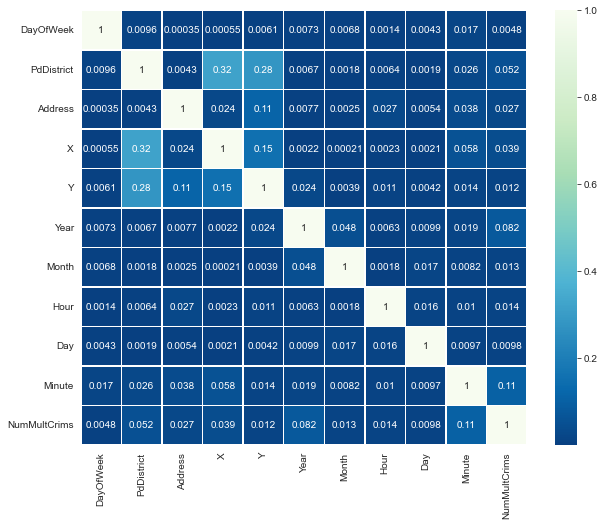

In [34]:
correlacio = X_model1.corr()
plt.figure(figsize=(10,8))
ax = sns.heatmap(abs(correlacio), annot=True, linewidths=.5, cmap = 'GnBu_r')
ax.tick_params(axis='x', rotation=90)
ax.tick_params(axis='y', rotation=0)

A simple vista estàn poc correlacionades, cosa que ens serveix per entrenar un model. És normal que ``X`` i ``Y`` es vegin més correlacionades amb ``PdDistrict`` o amb ``Adress``, ja que és informació redundant. Un fet a ser observable és la correlació de ``Minute`` amb ``NumMultCrimes``, afecta el minut a la quantitat de crims?

##### Separació dataset en train i test

In [35]:
#Normalitzem les dades
X_scaled = SSNormalitzacio(X_model1)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_model1, test_size=0.3, random_state=1)
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (612961, 11) (612961,)
Test (262698, 11) (262698,)


### Feature importance & selection

##### Lasso regression

In [36]:
features = X_model1.columns
pipeline = Pipeline([('scaler', StandardScaler()),('model',Lasso())])

search = GridSearchCV(pipeline, {'model__alpha':np.arange(0.1,3,0.1)}, cv = 5,scoring= 'neg_mean_squared_error',verbose=3)
search.fit(X_train, y_train)

print("Find best params:")
search.best_params_

print("Feature importances:")
Fimp = search.best_estimator_[1].coef_
print(Fimp)

print("Feature selection:")
Coef = np.array(features)[Fimp != 0]
print(Coef)

print("Train accuracy model sencer:")
print(search.score(X_train, y_train))

print("Test accuracy model sencer:")
print(search.score(X_test, y_test))

Fitting 5 folds for each of 29 candidates, totalling 145 fits
[CV 1/5] END ...............model__alpha=0.1;, score=-113.599 total time=   0.2s
[CV 2/5] END ...............model__alpha=0.1;, score=-113.519 total time=   0.2s
[CV 3/5] END ...............model__alpha=0.1;, score=-113.520 total time=   0.2s
[CV 4/5] END ...............model__alpha=0.1;, score=-113.625 total time=   0.2s
[CV 5/5] END ...............model__alpha=0.1;, score=-112.984 total time=   0.2s
[CV 1/5] END ...............model__alpha=0.2;, score=-113.814 total time=   0.3s
[CV 2/5] END ...............model__alpha=0.2;, score=-113.740 total time=   0.2s
[CV 3/5] END ...............model__alpha=0.2;, score=-113.713 total time=   0.2s
[CV 4/5] END ...............model__alpha=0.2;, score=-113.847 total time=   0.3s
[CV 5/5] END ...............model__alpha=0.2;, score=-113.227 total time=   0.2s
[CV 1/5] END model__alpha=0.30000000000000004;, score=-114.070 total time=   0.2s
[CV 2/5] END model__alpha=0.30000000000000004;

La _feature selection_ feta amb el model de Regressió Lasso no és un resultat fiable pel simple fet de que aquest només té en compte possibles relacions lineals entre les variables, i en el cas del dataset estudiat, podrien existir relacions no lineals que proporcionessin una classificació més acurada i correcta.

A més, el fet de que els accuracies amb el test i train siguin negatius és senyal de un mal model d'entrenament.

##### Random Forest Classifier

Feature importances:
[0.07696989 0.02294454 0.12353975 0.12598215 0.13026557 0.08721269
 0.0969652  0.10088401 0.11858074 0.08442353 0.03223193]


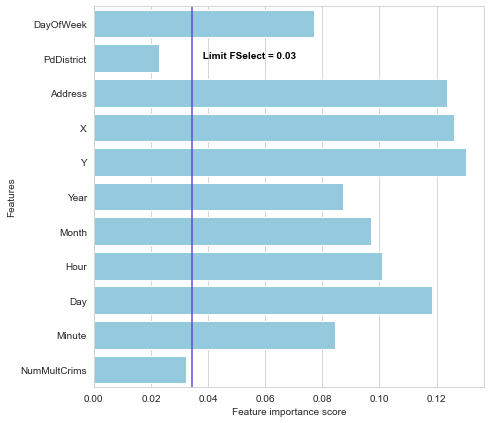

Feature selection:
['DayOfWeek' 'Address' 'X' 'Y' 'Year' 'Month' 'Hour' 'Day' 'Minute']
Train accuracy model sencer:
0.8890810345193251
Test accuracy model sencer:
0.3339423977342804


In [37]:
model = RandomForestClassifier(random_state=0)
model.fit(X_train, y_train)

importances = model.feature_importances_
print("Feature importances:")
print(importances)

features = X_model1.columns
f, ax = plt.subplots(figsize=(7, 7))
ax = sns.barplot(x=importances, y=features, color='skyblue')
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
ax.axvline(importances.std(),color="#6549DA")
ax.text(importances.std()+0.02,1," Límit FSelect = {:.2f} ".format(importances.std()), 
        horizontalalignment='center', size='medium', color='black', weight='semibold')
plt.show()

FSelect = np.array(features)[importances > importances.std()]
print("Feature selection:")
print(FSelect)

print("Train accuracy model sencer:")
print(model.score(X_train, y_train))

print("Test accuracy model sencer:")
print(model.score(X_test, y_test))

Time taken (s): 359.3524053096771


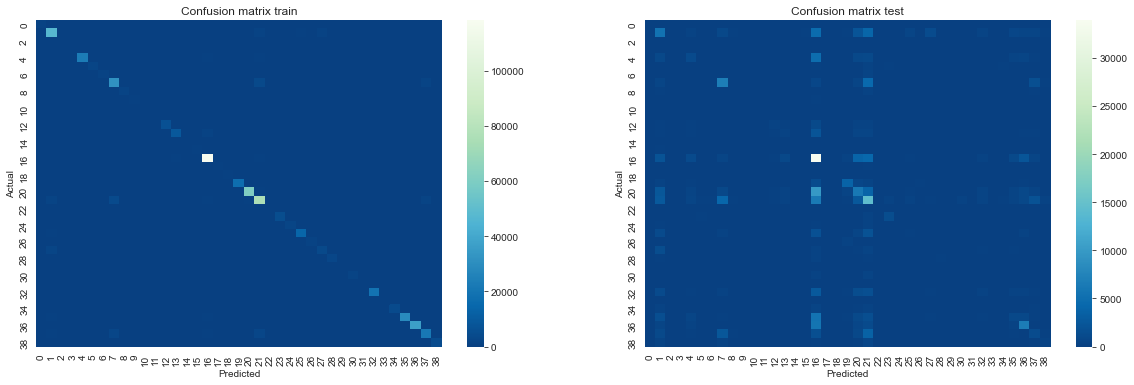

Accuracy train: 0.8890761402438329
Accuracy test: 0.3192182658413844


In [38]:
t0=time.time()
modelRF = RandomForestClassifier(random_state=0).fit(X_train[FSelect], y_train)
print('Time taken (s):' , time.time()-t0)
visualize_confusion_matrix(modelRF.predict(X_train[FSelect]),y_train,modelRF.predict(X_test[FSelect]),y_test, False)
CleanVar([X_train, X_test, y_train, y_test, X_scaled, FSelect, modelRF])

L'accuracy final obtingut no es gens bo. Com bé ja s'ha pogut observar a la matriu de correlacions de les variables explicatives, hi havia varis atributs que aportaven informació redundant, per tant, no s'haurien de fer servir.

#### SEGON MODEL

En aquest segon apartat es generarà un model implementant noves variables que poguessin afegir informació al context d'un crim per tal d'intentar augmentar l'accuracy del model.

In [39]:
ds_model2 = ds_copy.copy()

# Eliminar columnes innecesaries al context
ds_model2 = ds_model2.drop(columns=['Dates','Resolution','Descript','PdDistrict'])

# Prenent el nom de les columnes categoriques i numèriques
cols = ds_model2.columns
num_cols = ds_model2._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_cols))

# Canviant Address per si el crim és Block, St, Av o Pl
ds_model2['Block'] = ds_model2['Address'].str.contains('block', case=False).astype(int)
ds_model2['ST'] = ds_model2['Address'].str.contains('ST /', case=False).astype(int)
ds_model2['AV'] = ds_model2['Address'].str.contains('AV /', case=False).astype(int)
ds_model2['PL'] = ds_model2['Address'].str.contains('PL /', case=False).astype(int)
ds_model2 = ds_model2.drop(columns=['Address'])

# One Hot Encoding amb DayOfWeek
ds_model2 = pd.concat([ds_model2, pd.get_dummies(ds_model2.DayOfWeek)], axis=1)
ds_model2 = ds_model2.drop(columns=['DayOfWeek'])

# Afegir columna (1 o 0) per indicar si el dia del crim era festiu
ca_holidays = holidays.CA(years=[2003, 2015])
range_of_dates = pd.DatetimeIndex(ds_model2['Date'])
Holidays = pd.DataFrame(index=range_of_dates,data={"is_holiday": [date in ca_holidays for date in range_of_dates]})
Holidays = Holidays.reset_index()
ds_model2['is_holiday'] = Holidays['is_holiday'].astype(int)
ds_model2 = ds_model2.drop(['Date'], axis=1)
ds_model2

# Afegir columna estació + one hot encoding
ds_model2['Month'] = ds_model2['Month'].replace(list(range(3,7)), 'Spring')
ds_model2['Month'] = ds_model2['Month'].replace(list(range(7,10)), 'Summer')
ds_model2['Month'] = ds_model2['Month'].replace(list(range(10,13)), 'Outumn')
ds_model2['Month'] = ds_model2['Month'].replace(list(range(1,4)), 'Winter')
ds_model2 = ds_model2.rename(columns={"Month": "Season"})
ds_ohe = pd.DataFrame()
ds_ohe = ds_model2.copy()
ds_model2 = pd.concat([ds_ohe, pd.get_dummies(ds_ohe.Season, prefix='Season')], axis=1)
ds_model2 = ds_model2.drop(['Season'], axis=1)

# Separem el target dels atributs
enc = OrdinalEncoder() # transforma variables categòriques en numèriques
ds_modelOE = ds_model2.copy()
ds_modelOE[["Category"]] = enc.fit_transform(ds_modelOE[["Category"]]).astype(int)
y = ds_modelOE['Category']
X = ds_modelOE.drop(columns=['Category'])

# Visualització del nou dataset
print("")
print(ds_modelOE.shape)
ds_modelOE.head()

Separant dataset...

(875659, 24)


,Category,X,Y,Year,Hour,Day,Minute,NumMultCrims,Block,ST,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,is_holiday,Season_Outumn,Season_Spring,Season_Summer,Season_Winter
0,37,-122.425892,37.774599,2015,23,13,53,2,0,1,...,0,0,0,0,1,0,0,1,0,0
1,21,-122.425892,37.774599,2015,23,13,53,2,0,1,...,0,0,0,0,1,0,0,1,0,0
2,21,-122.424363,37.800414,2015,23,13,33,1,0,0,...,0,0,0,0,1,0,0,1,0,0
3,16,-122.426995,37.800873,2015,23,13,30,1,1,0,...,0,0,0,0,1,0,0,1,0,0
4,16,-122.438738,37.771541,2015,23,13,30,1,1,0,...,0,0,0,0,1,0,0,1,0,0


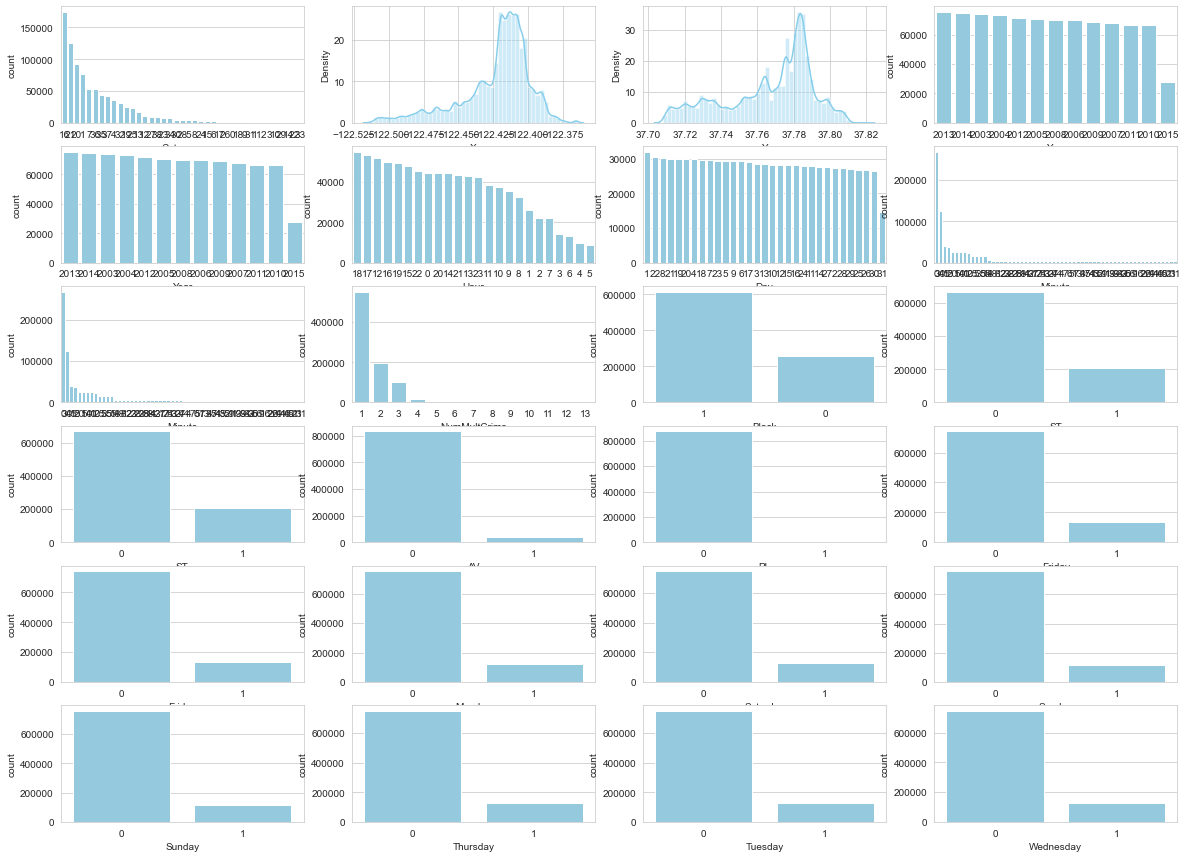

In [40]:
fig = plt.figure(figsize=(20,15))
gs = gridspec.GridSpec(6,4)
for i in range(0,6):
    for j in range(0,4):
        ax = fig.add_subplot(gs[i,j])
        c = ds_modelOE.columns[i*3+j]
        if ((c == 'X') or (c == 'Y')):
            sns.distplot(ds_modelOE[c], color = 'skyblue')
        else:
            sns.countplot(x=ds_modelOE[c], order = ds_modelOE[c].value_counts().index, color = 'skyblue')
plt.show()

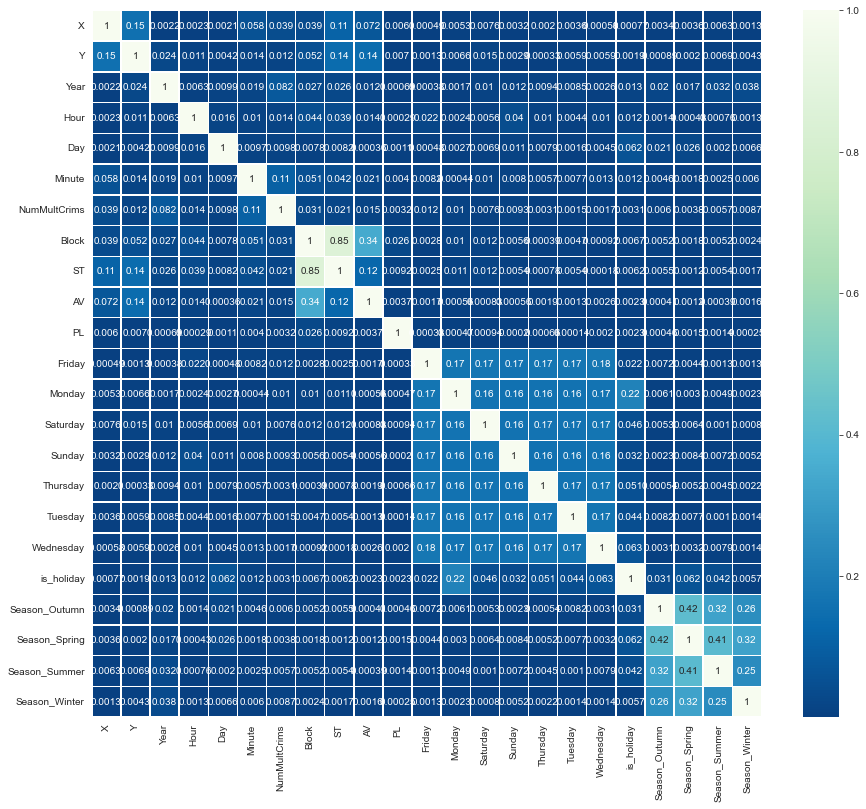

In [41]:
correlacio = X.corr()
plt.figure(figsize=(15,13))
ax = sns.heatmap(abs(correlacio), annot=True, linewidths=.5, cmap = 'GnBu_r')
ax.tick_params(axis='x', rotation=90)
ax.tick_params(axis='y', rotation=0)

##### Separació dataset en train i test

In [42]:
#Normalitzem les dades
X_scaled = SSNormalitzacio(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=1)
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (612961, 23) (612961,)
Test (262698, 23) (262698,)


### Feature importance & selection

##### Random forest classifier

Feature importances:
[1.74968448e-01 1.79750646e-01 1.00639254e-01 1.24434018e-01
 1.32819464e-01 1.02562450e-01 3.71356900e-02 6.66816150e-03
 4.15159967e-03 2.36934947e-03 9.31666981e-05 1.14252928e-02
 1.14168742e-02 9.20117627e-03 8.33868718e-03 1.16679532e-02
 1.08819628e-02 1.08444129e-02 5.80928450e-03 1.41956912e-02
 1.53487328e-02 1.37551843e-02 1.15225003e-02]


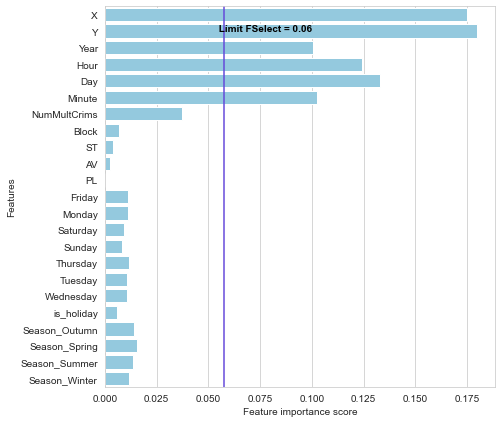

Feature selection:
['X' 'Y' 'Year' 'Hour' 'Day' 'Minute']
Train accuracy model sencer:
0.8890271974889103
Test accuracy model sencer:
0.31824376279986905


In [43]:
model = RandomForestClassifier(random_state=0)
model.fit(X_train, y_train)

importances = model.feature_importances_
print("Feature importances:")
print(importances)

features = X.columns
f, ax = plt.subplots(figsize=(7, 7))
ax = sns.barplot(x=importances, y=features, color='skyblue')
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
ax.axvline(importances.std(),color="#6549DA")
ax.text(importances.std()+0.02,1," Límit FSelect = {:.2f} ".format(importances.std()), 
        horizontalalignment='center', size='medium', color='black', weight='semibold')
plt.show()

FSelect = np.array(features)[importances > importances.std()]
print("Feature selection:")
print(FSelect)

print("Train accuracy model sencer:")
print(model.score(X_train, y_train))

print("Test accuracy model sencer:")
print(model.score(X_test, y_test))

Time taken (s): 226.16469812393188


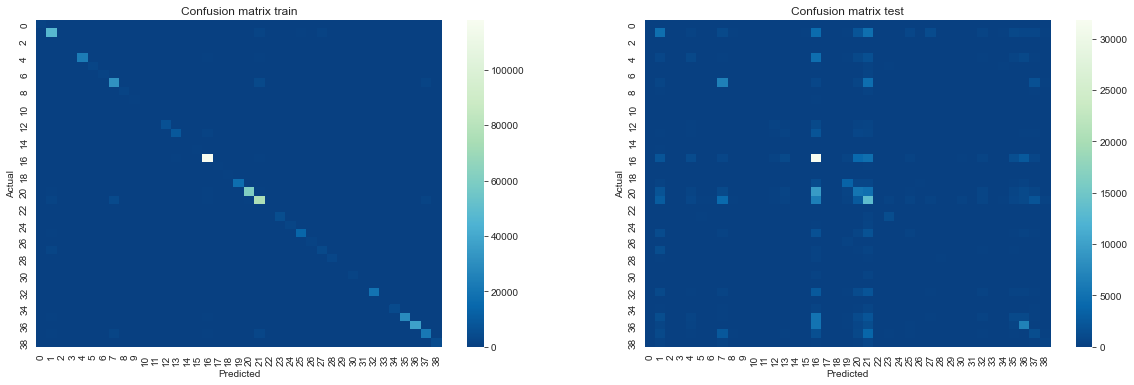

Accuracy train: 0.8853891193730107
Accuracy test: 0.29900113438244674


In [44]:
t0=time.time()
modelRF = RandomForestClassifier(random_state=0).fit(X_train[FSelect], y_train)
print('Time taken (s):' , time.time()-t0)
visualize_confusion_matrix(modelRF.predict(X_train[FSelect]),y_train,modelRF.predict(X_test[FSelect]),y_test,False)
CleanVar([X_train, X_test, y_train, y_test, X_scaled, FSelect, modelRF])

Intentar classificar les 39 classes del conjunt tenint en compte que el target està molt desbalanceijat és mot complicat. Per tant, en aquest últim model tractarem de reduir la dimensionalitat de les classes a predir per veure si el conjunt apren millor disminint les dades.

#### TERCER MODEL

In [45]:
ds_model3 = ds_model2.copy()

# Convertint les dades que suposen menys d'un 10% de les dades en una columna conjunta (predire les 4 més grans)
ds_CatVal = pd.DataFrame(ds_model2['Category'].value_counts()).reset_index().rename(columns={'Category':'value', 'index':'Category'})
ds_CatVal['Cat2'] = ds_CatVal.loc[:, 'Category']
ds_CatVal.loc[ds_CatVal['value'] < 53700, 'Cat2'] = 'OTHER CRIMES'
dic_CatVal = ds_CatVal.drop(columns = ['value']).set_index('Category').to_dict()['Cat2']
ds_model3['Category'] = ds_model3['Category'].map(dic_CatVal)

# Eliminar dades duplicades
ds_mida = ds_model3.copy()
ds_model3.drop_duplicates(subset=None,keep="first",inplace=True)
print('Mida original: ',ds_mida.shape,
     '\nNº de dades repetides: ', ds_mida.duplicated().sum(),
     '\nMida un cop fet el drop: ',ds_model3.shape)

# Separem el target dels atributs
enc = OrdinalEncoder() # transforma variables categòriques en numèriques
ds_modelAll = ds_model3.copy()
ds_modelAll[["Category"]] = enc.fit_transform(ds_modelAll[["Category"]]).astype(int)
y = ds_modelAll['Category']
X = ds_modelAll.drop(columns=['Category'])

# Visualització del nou dataset
print(ds_modelAll.shape)
ds_modelAll.head()

Mida original:  (875659, 24) 
Nº de dades repetides:  90268 
Mida un cop fet el drop:  (785391, 24)
(785391, 24)


,Category,X,Y,Year,Hour,Day,Minute,NumMultCrims,Block,ST,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,is_holiday,Season_Outumn,Season_Spring,Season_Summer,Season_Winter
0,4,-122.425892,37.774599,2015,23,13,53,2,0,1,...,0,0,0,0,1,0,0,1,0,0
1,5,-122.425892,37.774599,2015,23,13,53,2,0,1,...,0,0,0,0,1,0,0,1,0,0
2,5,-122.424363,37.800414,2015,23,13,33,1,0,0,...,0,0,0,0,1,0,0,1,0,0
3,2,-122.426995,37.800873,2015,23,13,30,1,1,0,...,0,0,0,0,1,0,0,1,0,0
4,2,-122.438738,37.771541,2015,23,13,30,1,1,0,...,0,0,0,0,1,0,0,1,0,0


A mode resum, els sis valors de ``Category`` que s'intentaràn classificar seràn les cinc categories més freqüents més una categoria _Other Crimes_ que conté els altres 34 crims possibles classificables.

| CATEGORIA | ORDINAL ENCODER | VALUE_COUNT |
|----------:|:---------------:|:-----------:|
| Other Crimes | 4 | 325791 |
| Larceny/Theft | 2 | 172538 |
| Other Offenses | 5 | 116688 |
| Non - Criminal | 3 | 90358 |
| Assault | 0 | 68486 |
| Drug/Narcotic | 1 | 39768 |

##### Separació dataset en train i test

In [46]:
#Normalitzem les dades
X_scaled = SSNormalitzacio(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=1)
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (549773, 23) (549773,)
Test (235618, 23) (235618,)


### Feature importance & selection

##### Random forest classifier

Feature importances:
[1.80683356e-01 1.87503568e-01 9.55477334e-02 1.25982564e-01
 1.33173745e-01 1.05193985e-01 3.26701698e-02 9.24222525e-03
 5.07270109e-03 2.83048857e-03 8.78838927e-05 1.01621848e-02
 1.03606059e-02 8.40726733e-03 8.17001403e-03 1.06423057e-02
 1.04911074e-02 1.00860678e-02 5.42184609e-03 1.24791771e-02
 1.36771942e-02 1.20849551e-02 1.00288538e-02]


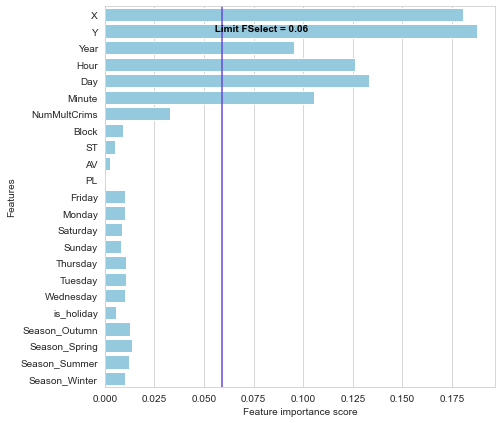

Feature selection:
['X' 'Y' 'Year' 'Hour' 'Day' 'Minute']
Train accuracy model sencer:
0.9108632108161004
Test accuracy model sencer:
0.38302676365982224


In [47]:
model = RandomForestClassifier(random_state=0)
model.fit(X_train, y_train)

importances = model.feature_importances_
print("Feature importances:")
print(importances)

features = X.columns
f, ax = plt.subplots(figsize=(7, 7))
ax = sns.barplot(x=importances, y=features, color='skyblue')
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
ax.axvline(importances.std(),color="#6549DA")
ax.text(importances.std()+0.02,1," Límit FSelect = {:.2f} ".format(importances.std()), 
        horizontalalignment='center', size='medium', color='black', weight='semibold')
plt.show()

FSelect = np.array(features)[importances > importances.std()]
print("Feature selection:")
print(FSelect)

print("Train accuracy model sencer:")
print(model.score(X_train, y_train))

print("Test accuracy model sencer:")
print(model.score(X_test, y_test))

Time taken (s): 128.01363468170166


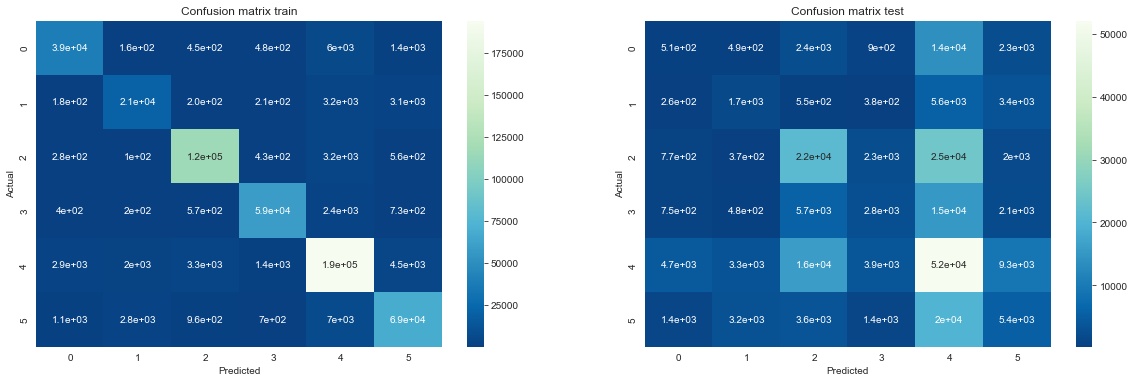

Accuracy train: 0.9075090992100376
Accuracy test: 0.35672571705048


In [48]:
t0=time.time()
modelRF = RandomForestClassifier(random_state=0).fit(X_train[FSelect], y_train)
print('Time taken (s):' , time.time()-t0)
visualize_confusion_matrix(modelRF.predict(X_train[FSelect]),y_train,modelRF.predict(X_test[FSelect]),y_test)
CleanVar([X_train, X_test, y_train, y_test, X_scaled, FSelect, modelRF, X, y])

S'ha vist un augment en l'accuracy, fet que ens fa pensar que el model va en bon camí. L'únic detall que falta per comentar és que en ser un model desbalancejat, prediu millor aquelles classes on té més dades. Quin és el problema llavors? Doncs ue està classificant a la perfecció la categoria _Other Crimes_ , que ve a ser un mix de moltes categories, per tant, com pot ser que s'estigui fent un embolic i per tant, no estigui aprenent com toca, anem a entrenar el mateix model però sense les dades de aquesta categoria extra, intentant classificar nomès els cinc crims més freqüents:

#### QUART MODEL

In [49]:
ds_modelwOC = ds_model3.copy()
ds_modelwOC = ds_modelwOC[ds_modelwOC['Category'] != 'OTHER CRIMES']

# Separem el target dels atributs
enc = OrdinalEncoder() # transforma variables categòriques en numèriques
ds_modelwOC_OE = ds_modelwOC.copy()
ds_modelwOC_OE[["Category"]] = enc.fit_transform(ds_modelwOC_OE[["Category"]]).astype(int)
y = ds_modelwOC_OE['Category']
X = ds_modelwOC_OE.drop(columns=['Category'])

# Visualització del nou dataset
print(ds_modelwOC_OE.shape)
ds_modelwOC_OE.head()

(487838, 24)


,Category,X,Y,Year,Hour,Day,Minute,NumMultCrims,Block,ST,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,is_holiday,Season_Outumn,Season_Spring,Season_Summer,Season_Winter
1,4,-122.425892,37.774599,2015,23,13,53,2,0,1,...,0,0,0,0,1,0,0,1,0,0
2,4,-122.424363,37.800414,2015,23,13,33,1,0,0,...,0,0,0,0,1,0,0,1,0,0
3,2,-122.426995,37.800873,2015,23,13,30,1,1,0,...,0,0,0,0,1,0,0,1,0,0
4,2,-122.438738,37.771541,2015,23,13,30,1,1,0,...,0,0,0,0,1,0,0,1,0,0
5,2,-122.403252,37.713431,2015,23,13,30,1,1,0,...,0,0,0,0,1,0,0,1,0,0


##### Separació dataset en train i test

In [50]:
#Normalitzem les dades
X_scaled = SSNormalitzacio(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=1)
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (341486, 23) (341486,)
Test (146352, 23) (146352,)


### Feature importance & selection

##### Random forest classifier

Feature importances:
[1.68233858e-01 1.79241907e-01 9.47235651e-02 1.19721268e-01
 1.24271442e-01 1.18400076e-01 5.02276819e-02 1.13489019e-02
 5.58940545e-03 3.91527177e-03 9.35459217e-05 1.10394992e-02
 1.04609568e-02 9.04953924e-03 8.29742374e-03 1.05278640e-02
 1.04299945e-02 9.62472744e-03 5.32711647e-03 1.26915090e-02
 1.37604730e-02 1.26357525e-02 1.03882210e-02]


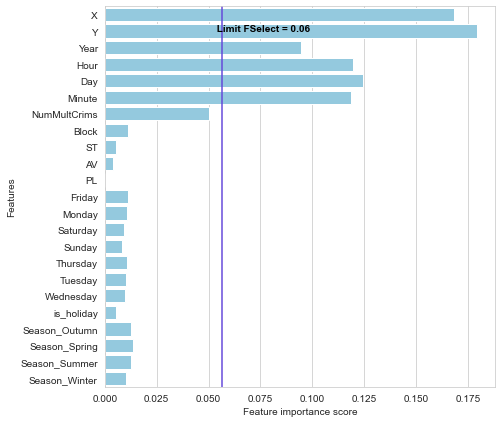

Feature selection:
['X' 'Y' 'Year' 'Hour' 'Day' 'Minute']
Train accuracy model sencer:
0.9546072166940958
Test accuracy model sencer:
0.45790286432710176


In [51]:
model = RandomForestClassifier(random_state=0)
model.fit(X_train, y_train)

importances = model.feature_importances_
print("Feature importances:")
print(importances)

features = X.columns
f, ax = plt.subplots(figsize=(7, 7))
ax = sns.barplot(x=importances, y=features, color='skyblue')
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
ax.axvline(importances.std(),color="#6549DA")
ax.text(importances.std()+0.02,1," Límit FSelect = {:.2f} ".format(importances.std()), 
        horizontalalignment='center', size='medium', color='black', weight='semibold')
plt.show()

FSelect = np.array(features)[importances > importances.std()]
print("Feature selection:")
print(FSelect)

print("Train accuracy model sencer:")
print(model.score(X_train, y_train))

print("Test accuracy model sencer:")
print(model.score(X_test, y_test))

Time taken (s): 64.12950420379639


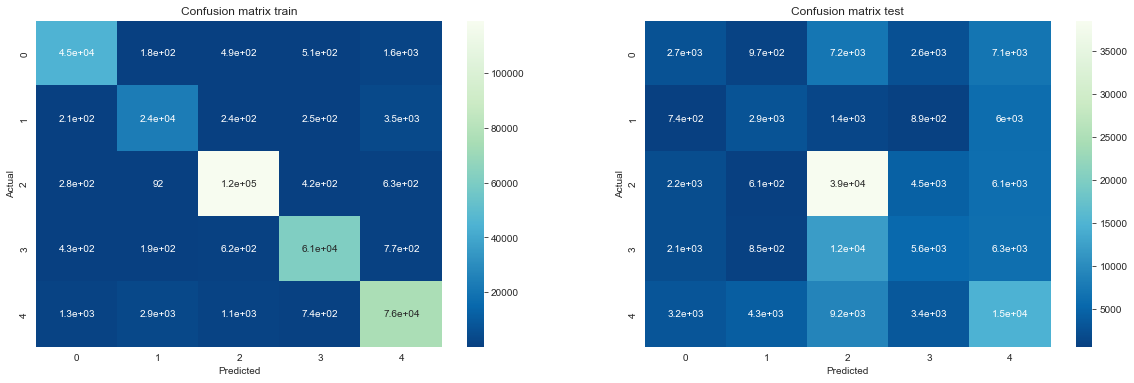

Accuracy train: 0.9519101807980415
Accuracy test: 0.44004864983054554


In [52]:
t0=time.time()
modelRF = RandomForestClassifier(random_state=0).fit(X_train[FSelect], y_train)
print('Time taken (s):' , time.time()-t0)
visualize_confusion_matrix(modelRF.predict(X_train[FSelect]),y_train,modelRF.predict(X_test[FSelect]),y_test)

Amb aquest accuracy de practicament 0.5, es dona er finalitzada l'apartat de creació de models. Ara, en el seguent apartat es tractarà de probar nous models i combinar paràmetres per extreure les conclusions finals del treball.

### Model selection

Model Random Forest Classifier
Time taken (s): 31.427062273025513


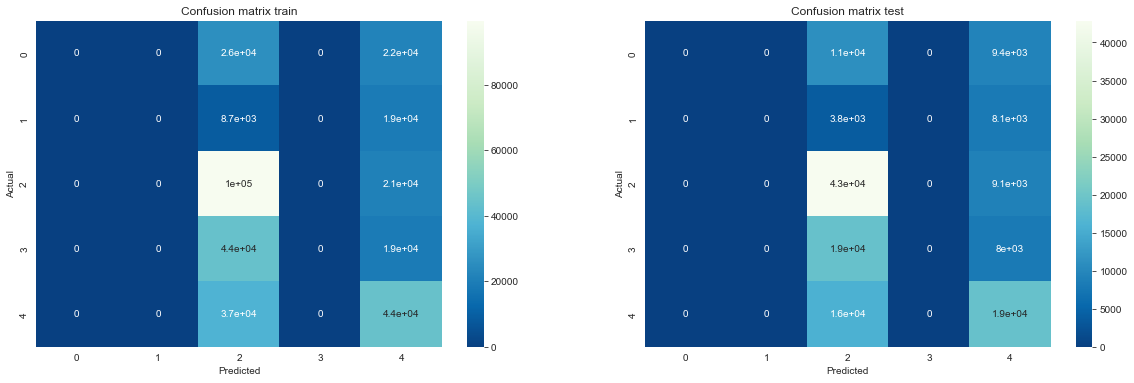

Accuracy train: 0.4215341185290173
Accuracy test: 0.42316469880835245

Model Gradient Boosting Classifier
Time taken (s): 29.866822242736816


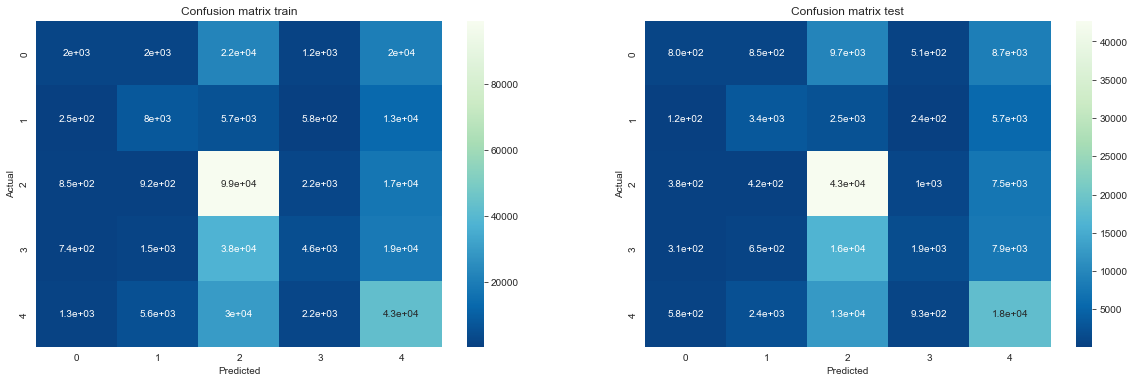

Accuracy train: 0.458645449593834
Accuracy test: 0.4590644473597901
Model Extrem Gradient Boosting Classifier
Time taken (s): 56.54801535606384


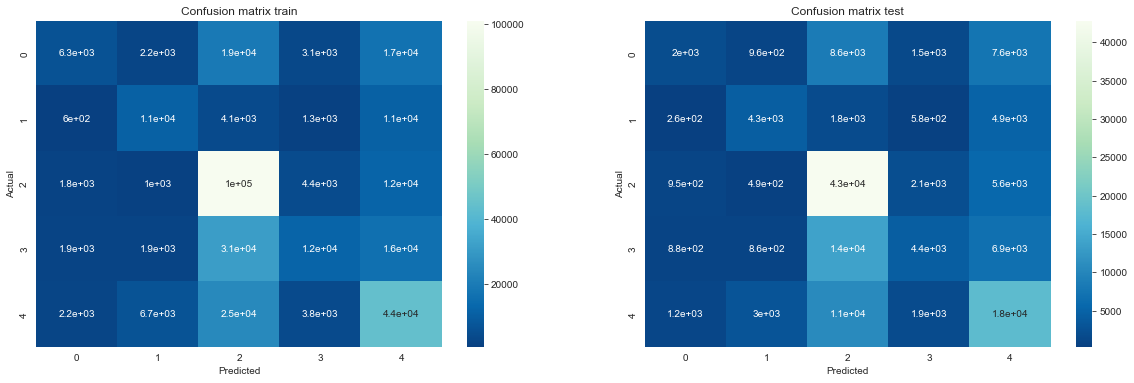

Accuracy train: 0.5116344447502972
Accuracy test: 0.48970290805728656

Model Light Gradient Boosting Classifier
Time taken (s): 5.8046019077301025


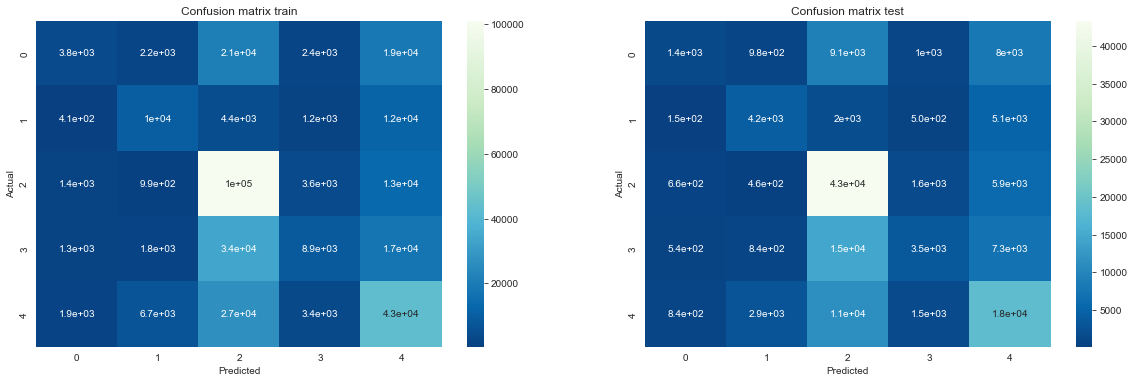

Accuracy train: 0.4892118564157828
Accuracy test: 0.4835396851426697

Model Multi-Layer Perceptron Classifier
Time taken (s): 318.87932562828064


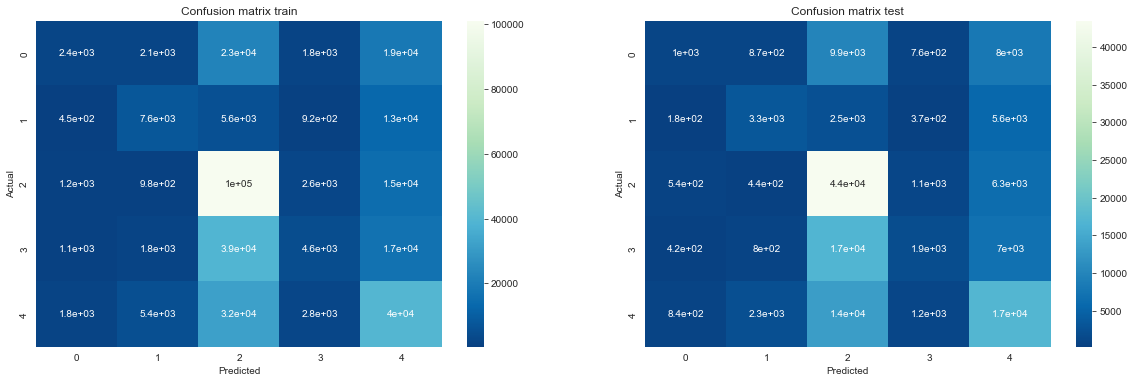

Accuracy train: 0.4550640436211148
Accuracy test: 0.45616732261943804

Model One Vs Rest Classifier
Time taken (s): 0.8817951679229736


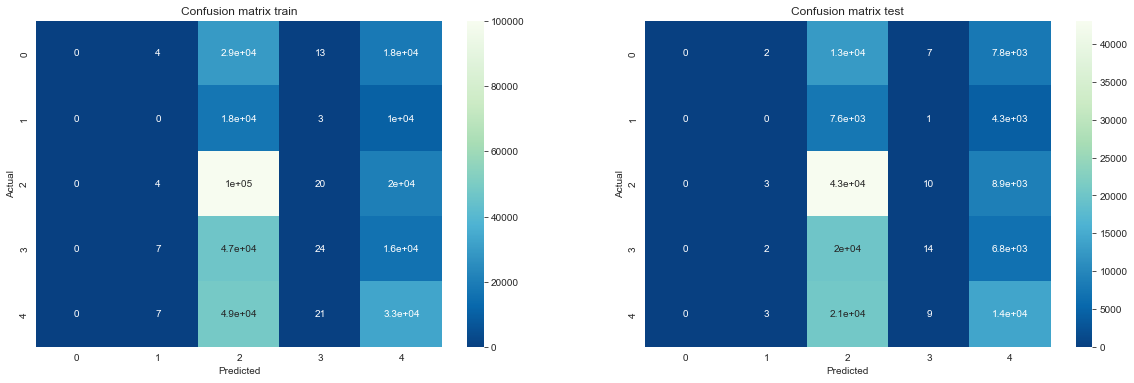

Accuracy train: 0.39050502802457493
Accuracy test: 0.39211626762873075

Model KNN Classifier
Time taken (s): 0.658719539642334


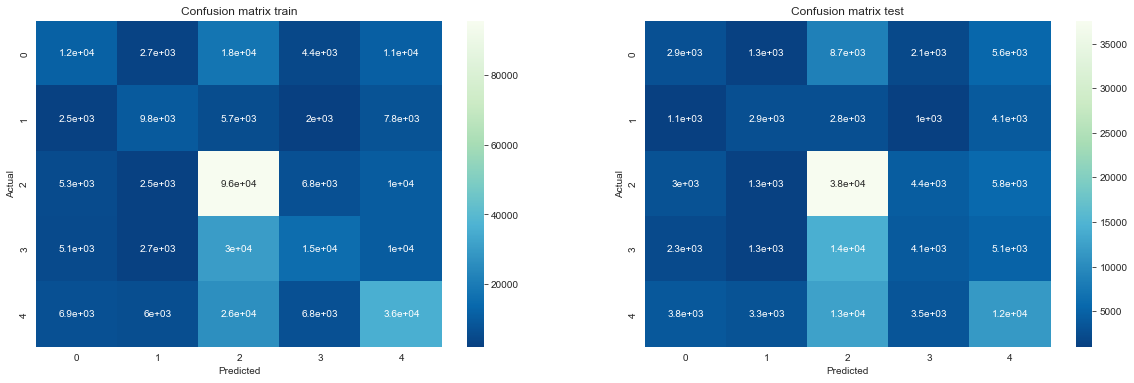

Accuracy train: 0.49233936383922033
Accuracy test: 0.40453837323712694

El millor model és XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...) amb un accuracy de 0.48970290805728656


In [53]:
mSelection(X_train, y_train, X_test, y_test, FSelect)

Taula resum de models i resultats:

| MODEL | ACCURACY TRAIN | ACCURACY TEST | TEMPS EXECUCIÓ |
|:-----:|:--------------:|:-------------:|:--------------:|
| Random Forest Classifier | 0.42 | 0.42 | 35.32 s |
| Gradient Boosting Classifier | 0.46 | 0.46 | 57.53 s |
| Extrem Gradient Boosting Classifier | 0.51 | 0.49 | 84.22 s |
| Light Gradient Boosting Classifier | 0.49 | 0.48 | 7.56 s |
| Multi-layer Perceptron Classifier | 0.46 | 0.46 | 829.55 s |
| One Vs Rest Classifier | 0.39 | 0.39 | 1.96 s |
| KNN Classifier | 0.41 | 0.40 | 1.51 s |

### Cross - Validation

#### GRID SEARCH

De la benchmark, es pot observar com el millor accuracy obtingut en l'apartat anterior ha estat amb el model _Extrem Gradient Boosting Classifier_ amb un temps de 84.21 s, seguit del _Light Gradient Boosting Classifier_ i per temps, _Gradient Boosting Classifier_ . Per tant, a continuaci´s'intentarà jugar amb els paràmetres per trobar els que facin un accurcy máxim dins d'un temps racional.

##### Grid Search Gradient Boosting

In [54]:
grid = {"learning_rate": [0.01, 0.1, 0.3],
    "max_depth":[4,3,2],
    "criterion": ["friedman_mse",  "mae"]}
t0=time.time()
gb_cv = GridSearchCV(GradientBoostingClassifier(), grid, n_jobs=-1, verbose=2, cv = 2)
gb_cv.fit(X_train[FSelect], y_train)
print('Time taken (m):' , (time.time()-t0)/60)
print("Test accuracy:", gb_cv.score(X_test[FSelect], y_test))

print("Grid Search best params:")
print(gb_cv.best_params_)

Fitting 2 folds for each of 18 candidates, totalling 36 fits
Time taken (m): 19.144636158148447
Test accuracy: 0.4852068984366459
Grid Search best params:
{'criterion': 'friedman_mse', 'learning_rate': 0.3, 'max_depth': 4}


##### Grid Search Extreme Gradient Boosting

In [55]:
grid = {"learning_rate": [0.01, 0.1, 0.3],
       'max_depth':[9,6,3],
       'alpha' : [0,0.5,1]}
t0=time.time()
xgb_cv = GridSearchCV(XGBClassifier(), grid, n_jobs=-1, verbose=2, cv = 2)
xgb_cv.fit(X_train[FSelect], y_train)
print('Time taken (m):' , (time.time()-t0)/60)
print("Test accuracy:", xgb_cv.score(X_test[FSelect], y_test))

print("Grid Search best params:")
print(xgb_cv.best_params_)

Fitting 2 folds for each of 27 candidates, totalling 54 fits
Time taken (m): 30.577501185735066
Test accuracy: 0.48957991691264896
Grid Search best params:
{'alpha': 1, 'learning_rate': 0.3, 'max_depth': 6}


##### Grid Search Light Gradient Boosting

In [56]:
Fi
t0=time.time()
lgb_cv = GridSearchCV(lgb.LGBMClassifier(tree_learner='data', is_unbalance = True), grid, n_jobs=-1, verbose=2, cv = 2)
lgb_cv.fit(X_train[FSelect], y_train)
print('Time taken (m):' , (time.time()-t0)/60)
print("Test accuracy:", lgb_cv.score(X_test[FSelect], y_test))

print("Grid Search best params:")
print(lgb_cv.best_params_)

Fitting 2 folds for each of 18 candidates, totalling 36 fits
Time taken (m): 2.809882227579753
Test accuracy: 0.4879332021427791
Grid Search best params:
{'learning_rate': 0.3, 'max_depth': 6, 'subsample': 0.6}


#### ENTRENAMENT AMB _best\_params_

Model Gradient Boosting Classifier
Time taken (s): 293.72759103775024


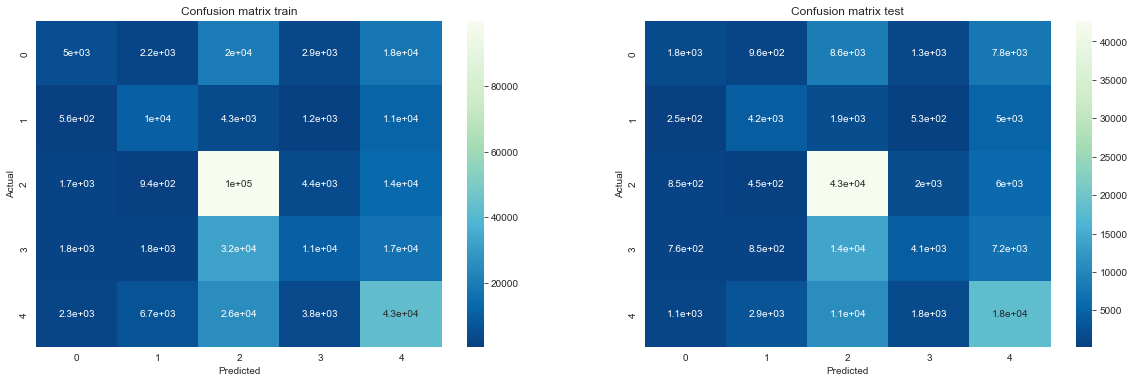

Accuracy train: 0.4945883579414676
Accuracy test: 0.4852068984366459

Model Extrem Gradient Boosting Classifier
Time taken (s): 63.39033484458923


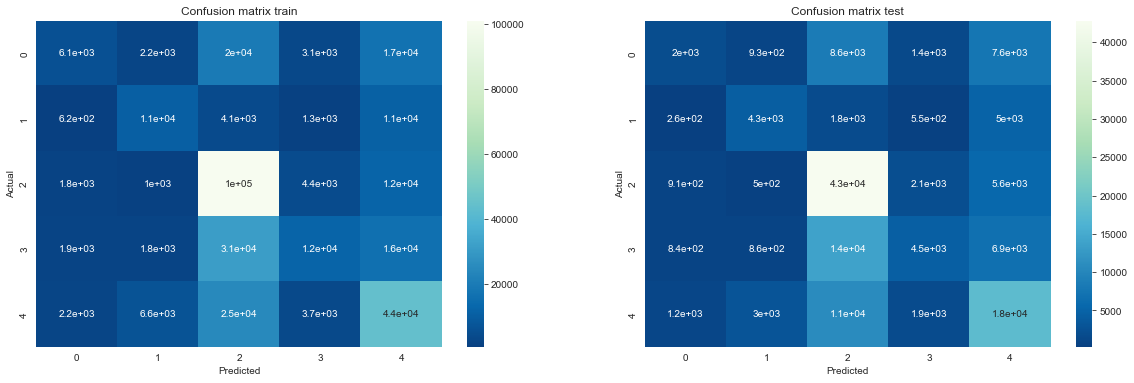

Accuracy train: 0.5108320692502767
Accuracy test: 0.48957991691264896

Model Light Gradient Boosting Classifier
Time taken (s): 4.7619242668151855


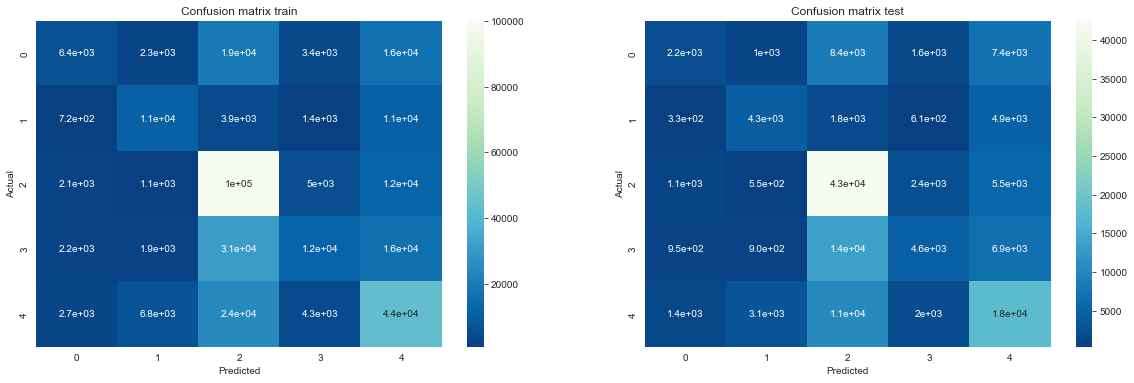

Accuracy train: 0.5071013160129552
Accuracy test: 0.4879332021427791


In [57]:
# Gradient Boosting Classifier
print("Model Gradient Boosting Classifier")
t0=time.time()
modelGB = GradientBoostingClassifier(**gb_cv.best_params_)
modelGB.fit(X_train[FSelect], y_train)
print('Time taken (s):' , time.time()-t0)
GBacc = visualize_confusion_matrix(modelGB.predict(X_train[FSelect]),
                                   y_train, modelGB.predict(X_test[FSelect]), y_test, ret = True)

# Extrem Gradient Boosting Classifier
print("\nModel Extrem Gradient Boosting Classifier")
t0=time.time()
modelXGB = XGBClassifier(**xgb_cv.best_params_).fit(X_train[FSelect], y_train)
print('Time taken (s):' , time.time()-t0)
XGBacc = visualize_confusion_matrix(modelXGB.predict(X_train[FSelect]),
                                   y_train, modelXGB.predict(X_test[FSelect]), y_test, ret = True)

# Light Gradient Boosting Machine
print("\nModel Light Gradient Boosting Classifier")
t0=time.time()
modelLGB = lgb.LGBMClassifier(**lgb_cv.best_params_).fit(X_train[FSelect], y_train)
print('Time taken (s):' , time.time()-t0)
LGBacc = visualize_confusion_matrix(modelLGB.predict(X_train[FSelect]),
                                   y_train, modelLGB.predict(X_test[FSelect]), y_test, ret = True)

Taula resum de models i resultats:

| MODEL | ACCURACY TRAIN | ACCURACY TEST | TEMPS EXECUCIÓ |
|:-----:|:--------------:|:-------------:|:--------------:|
| Gradient Boosting Classifier | 0.49 | 0.49 | 293.73 s |
| Extrem Gradient Boosting Classifier | 0.51 | 0.49 | 63.39 s |
| Light Gradient Boosting Classifier | 0.50 | 0.49 | 4.76 s |

In [65]:
# Gradient Boosting Classifier
print("Model Gradient Boosting Classifier")
print(classification_report(y_test, modelGB.predict(X_test[FSelect])))

# Extrem Gradient Boosting Classifier
print("\nModel Extrem Gradient Boosting Classifier")
print(classification_report(y_test, modelXGB.predict(X_test[FSelect])))

# Light Gradient Boosting Machine
print("\nModel Light Gradient Boosting Classifier")
print(classification_report(y_test, modelLGB.predict(X_test[FSelect])))


Model Gradient Boosting Classifier
              precision    recall  f1-score   support

           0       0.38      0.09      0.14     20571
           1       0.45      0.35      0.39     11920
           2       0.55      0.82      0.66     52002
           3       0.42      0.15      0.22     27012
           4       0.41      0.52      0.46     34847

    accuracy                           0.49    146352
   macro avg       0.44      0.39      0.38    146352
weighted avg       0.46      0.49      0.44    146352


Model Extrem Gradient Boosting Classifier
              precision    recall  f1-score   support

           0       0.39      0.10      0.16     20571
           1       0.45      0.36      0.40     11920
           2       0.55      0.82      0.66     52002
           3       0.43      0.17      0.24     27012
           4       0.42      0.52      0.46     34847

    accuracy                           0.49    146352
   macro avg       0.45      0.39      0.38    146352

#### ANÀLISI EXTRA

A l'apartat de _EDA_ anterior, s'ha arribat a la conclusió gràcies a un test $\chi^2$ que les variables ``Descript`` i ``Category`` estaven molt correlacionades, per tant, què passaria si s'entrenes un model comptant amb aquesta variable?

In [58]:
ds_modelExtra = ds_copy.copy()

# Eliminar columnes innecesaries al context
ds_modelExtra = ds_modelExtra.drop(columns=['Date','Dates','Resolution'])

# Prenent el nom de les columnes categoriques i numèriques
cols = ds_modelExtra.columns
num_cols = ds_modelExtra._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_cols))

# LabelEncoder sobre les columnes categòriques
le = LabelEncoder()
for c in cat_cols:
    ds_modelExtra[c] = le.fit_transform(ds_modelExtra[c])
    
# Separació del conjunt en X i Y
y_modelExtra = ds_modelExtra['Category']
X_modelExtra = ds_modelExtra.drop(columns=['Category'])

# Visualització del nou dataset
print(ds_modelExtra.shape)
ds_modelExtra.head()

(875659, 13)


,Category,Descript,DayOfWeek,PdDistrict,Address,X,Y,Year,Month,Hour,Day,Minute,NumMultCrims
0,37,866,6,4,19762,-122.425892,37.774599,2015,5,23,13,53,2
1,21,810,6,4,19762,-122.425892,37.774599,2015,5,23,13,53,2
2,21,810,6,4,22661,-122.424363,37.800414,2015,5,23,13,33,1
3,16,404,6,4,4266,-122.426995,37.800873,2015,5,23,13,30,1
4,16,404,6,5,1843,-122.438738,37.771541,2015,5,23,13,30,1


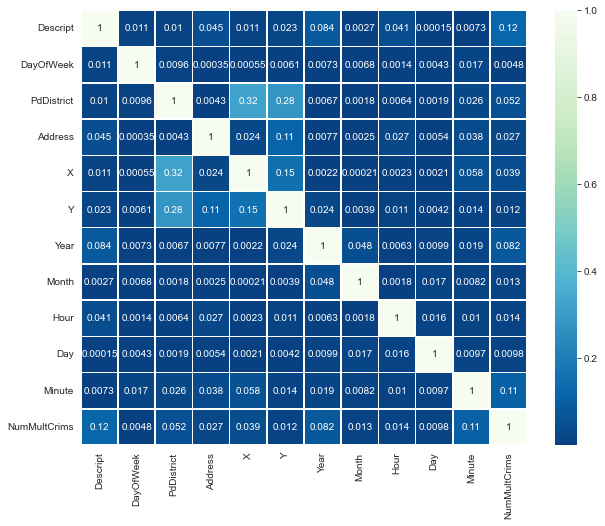

In [59]:
correlacio = X_modelExtra.corr()
plt.figure(figsize=(10,8))
ax = sns.heatmap(abs(correlacio), annot=True, linewidths=.5, cmap = 'GnBu_r')
ax.tick_params(axis='x', rotation=90)
ax.tick_params(axis='y', rotation=0)

##### Separació dataset en train i test

In [60]:
#Normalitzem les dades
X_scaledExtra = SSNormalitzacio(X_modelExtra)

X_trainExtra, X_testExtra, y_trainExtra, y_testExtra = train_test_split(X_scaledExtra, y_modelExtra, test_size=0.3, random_state=1)
print('Train', X_trainExtra.shape, y_trainExtra.shape)
print('Test', X_testExtra.shape, y_testExtra.shape)

Train (612961, 12) (612961,)
Test (262698, 12) (262698,)


### Feature importance & selection

##### Random Forest Classifier

Feature importances:
[0.59333088 0.02488491 0.01447544 0.05225187 0.0508967  0.05387724
 0.03559733 0.03053196 0.0379037  0.03715759 0.03997343 0.02911897]


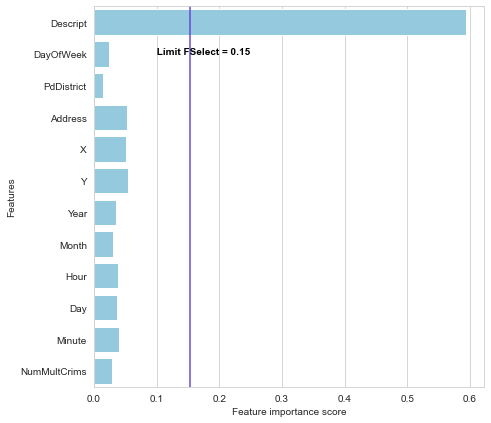

Feature selection:
['Descript']
Train accuracy model sencer:
0.9999820543231951
Test accuracy model sencer:
0.9128923707070477


In [61]:
model = RandomForestClassifier(random_state=0)
model.fit(X_trainExtra, y_trainExtra)

importances = model.feature_importances_
print("Feature importances:")
print(importances)

features = X_modelExtra.columns
f, ax = plt.subplots(figsize=(7, 7))
ax = sns.barplot(x=importances, y=features, color='skyblue')
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
ax.axvline(importances.std(),color="#6549DA")
ax.text(importances.std()+0.02,1," Límit FSelect = {:.2f} ".format(importances.std()), 
        horizontalalignment='center', size='medium', color='black', weight='semibold')
plt.show()

FSelectExtra = np.array(features)[importances > importances.std()]
print("Feature selection:")
print(FSelectExtra)

print("Train accuracy model sencer:")
print(model.score(X_trainExtra, y_trainExtra))

print("Test accuracy model sencer:")
print(model.score(X_testExtra, y_testExtra))

Time taken: 45.22174382209778


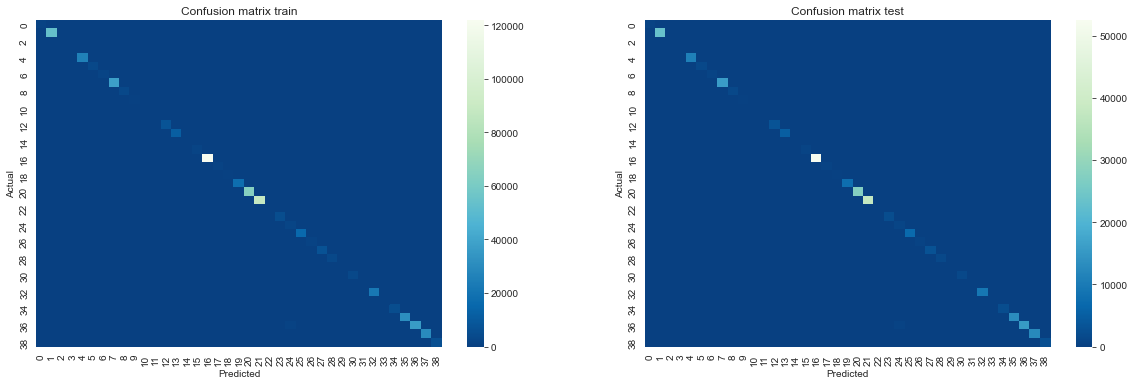

Accuracy train: 0.9973848254619788
Accuracy test: 0.9971373973155486


In [62]:
t0=time.time()
modelRF = RandomForestClassifier(random_state=0).fit(X_trainExtra[FSelectExtra], y_trainExtra)
print('Time taken:' , time.time()-t0)
visualize_confusion_matrix(modelRF.predict(X_trainExtra[FSelectExtra]),y_trainExtra,
                           modelRF.predict(X_testExtra[FSelectExtra]),y_testExtra,False)